In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from collections import defaultdict, Counter
from pprint import pprint
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.path.abspath(''), 'triple_agent'))
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.action_tests import ActionTest
from triple_agent.utilities.outcomes import WinType
from triple_agent.utilities.missions import Missions
from triple_agent.utilities.roles import Roles

In [3]:
from triple_agent.reports.mission_choices import mission_choices
from triple_agent.reports.mission_completes import mission_completion_query, mission_completion
from triple_agent.reports.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.banana_breads import (all_banana_bread_percentages,
                                                first_banana_bread_percentages,
                                                banana_split)
from triple_agent.reports.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_role)
from triple_agent.reports.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.time_adds import time_add_times
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.reports.seduce import first_flirt_timing
from triple_agent.reports.report_utilities import SCL5_PICK_MODES, SCL5_VENUE_MODES
from triple_agent.reports.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.mission_progress import mission_progress
from triple_agent.reports.microfilm import at_or_direct_mf, microfilm_direction
from triple_agent.reports.scl_set_scores import scl_set_scores_categorize, game_differential
from triple_agent.utilities.scl_set import sort_games_into_sets
from triple_agent.reports.game_durations import game_durations

In [4]:
DIVISIONS = ["Diamond", "Platinum", "Gold", "Silver", "Bronze", "Copper", "Iron","Obsidian", "Oak", "Challenger"]

In [5]:
dropped_players = {
    'baldrick',
    "brskaylor",
    "rta",
    "Hectic",
    "bitbandingpig",
    "frostie",
    "belial",
    "tristram",
    "the_usual_toaster" ,
    "ThatOdinaryPlayer",
    "PixelBandit",
    "gasol",
    "kevino",
    "tge",
    "Tortuga-Man",
    "Vlady",
    "sergioc89",
    "mintyrug",
    "ml726"
}

In [6]:
def select_scl5(game):           
    return (
        game.event == 'SCL5' and 
        game.division != 'Challenger' and
        game.spy not in dropped_players and 
        game.sniper not in dropped_players
    )

In [7]:
scl5_replays = get_parsed_replays(select_scl5)

In [8]:
scl5_scl_sets = sort_games_into_sets(scl5_replays)

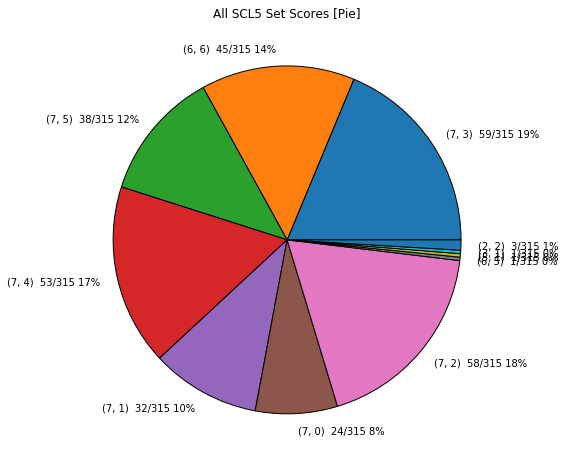

In [9]:
scl_set_scores_categorize(scl5_scl_sets, 'All SCL5 Set Scores [Pie]')

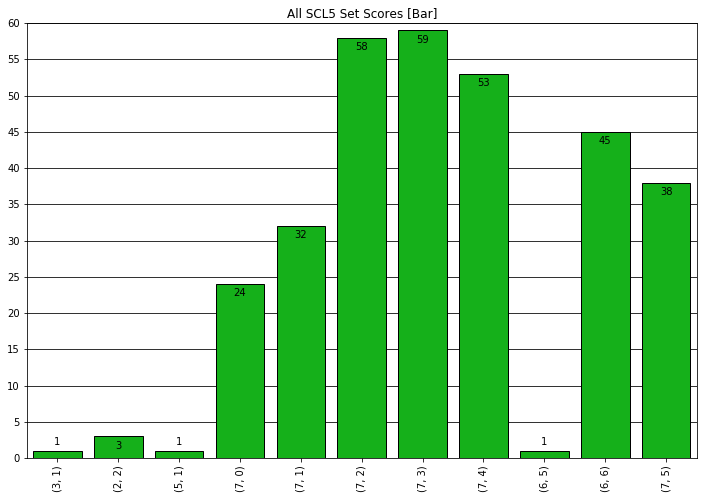

In [10]:
scl_set_scores_categorize(
    scl5_scl_sets,
    'All SCL5 Set Scores [Bar]',
    category_name_order=lambda s: sum(s),
    force_bar=True)

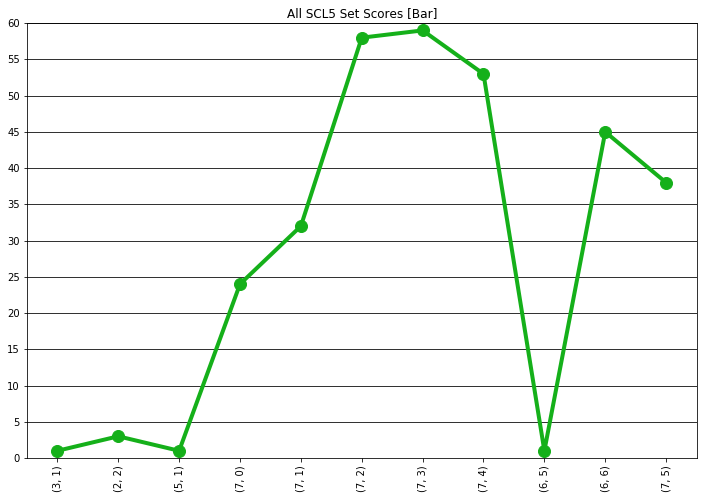

In [11]:
scl_set_scores_categorize(
    scl5_scl_sets,
    'All SCL5 Set Scores [Bar]',
    category_name_order=lambda s: sum(s),
    force_line=True)

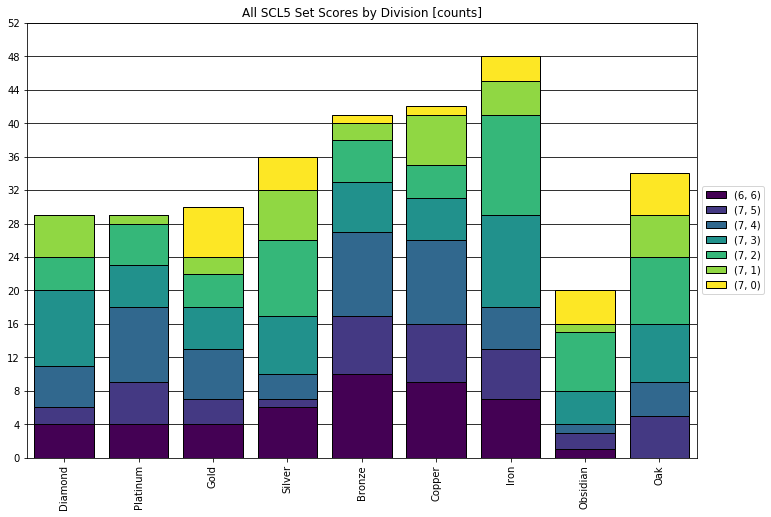

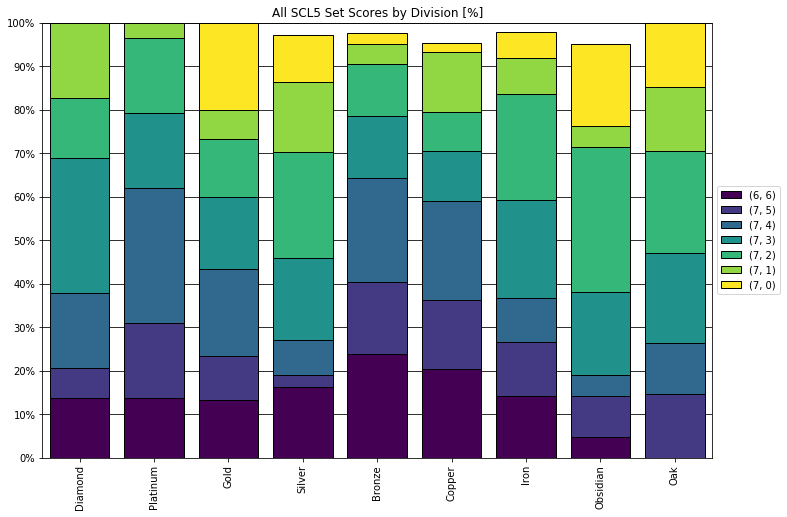

In [12]:
scores = [(6,6),(7,5),(7,4),(7,3),(7,2),(7,1),(7,0)]
cmap = plt.get_cmap('viridis', len(scores))

color_dict = {score:cmap(i) for i,score in enumerate(scores)}

scl_set_scores_categorize(
    scl5_scl_sets,
    'All SCL5 Set Scores by Division',
    groupby=lambda s: s.division,
    data_stack_order = scores,
    data_color_dict = color_dict,
    category_name_order=lambda s: DIVISIONS.index(s),
)

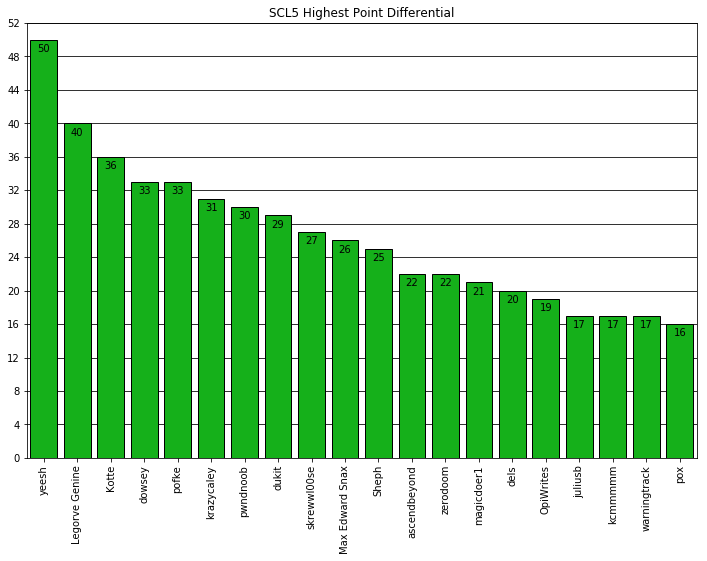

In [13]:
game_differential(
    scl5_scl_sets,
    'SCL5 Highest Point Differential',
    percentile_plot=False,
    reversed_data_sort=True,
    limit=20,
    category_data_order=sum,
)

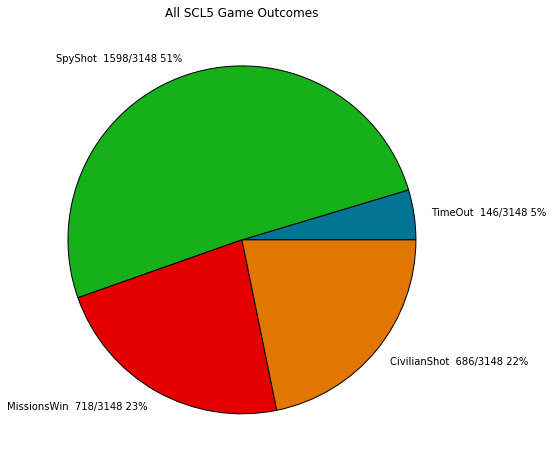

In [14]:
game_outcomes(scl5_replays, "All SCL5 Game Outcomes")

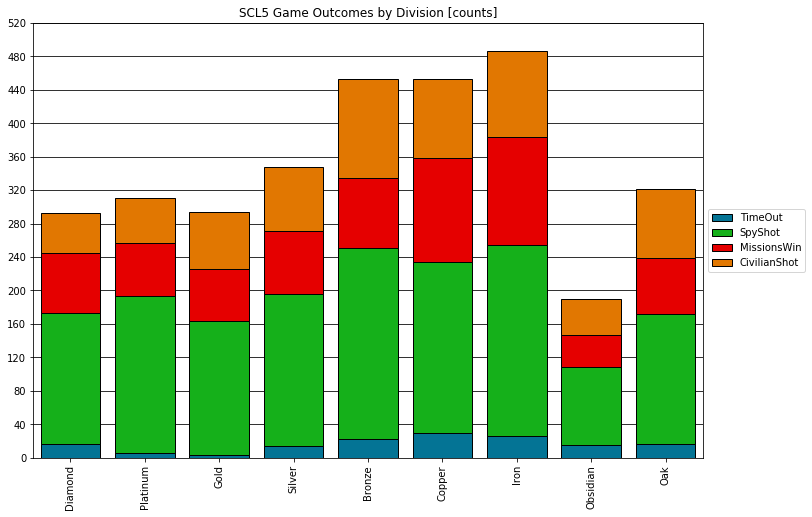

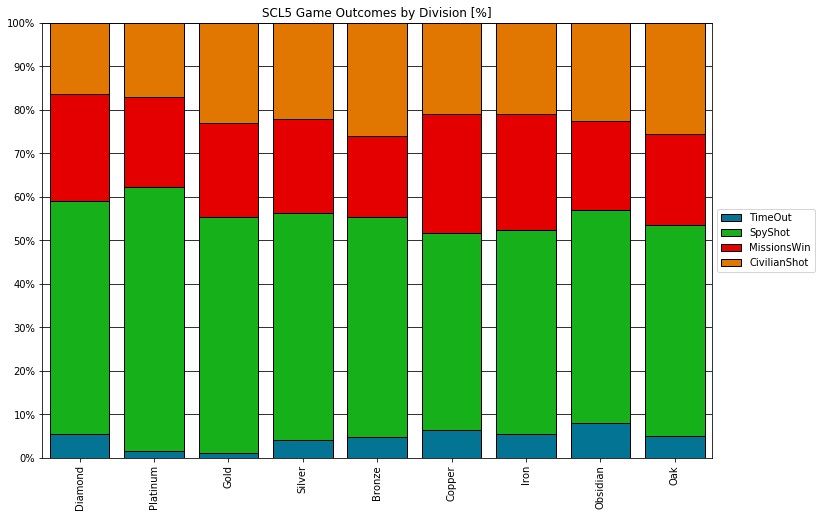

In [15]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g))

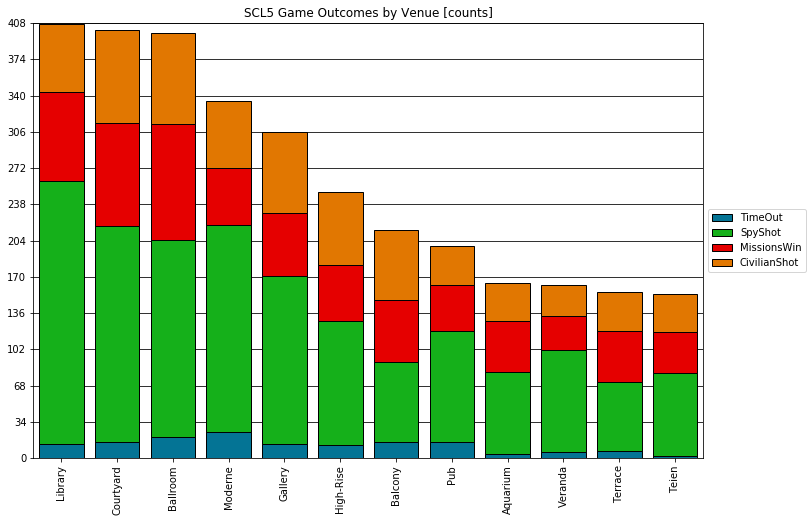

In [16]:
game_outcomes(scl5_replays,
    "SCL5 Game Outcomes by Venue",
    groupby=lambda g: g.venue,
    category_data_order=sum,
    percentile_plot=False)

In [17]:
def sort_by_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

In [18]:
def sort_by_sniper_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SniperWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

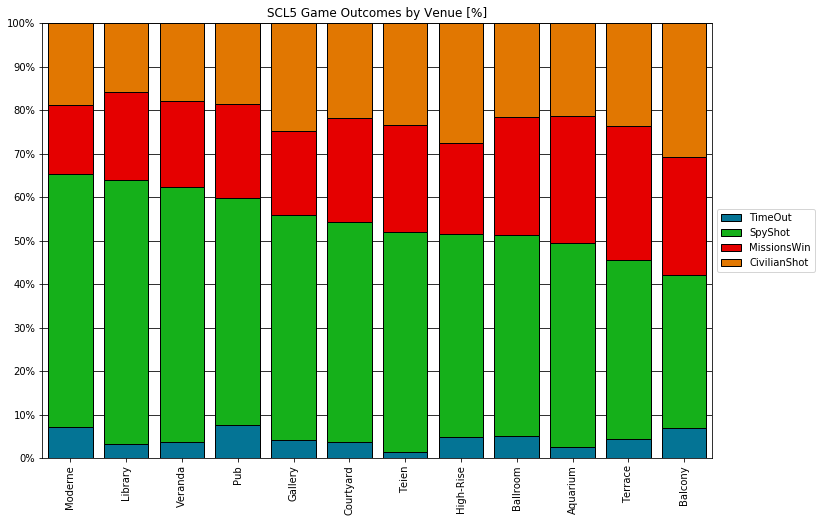

In [19]:
game_outcomes(scl5_replays,
    "SCL5 Game Outcomes by Venue",
    groupby=lambda g: g.venue,
    category_data_order=sort_by_spy_wins,
    counts_plot=False)

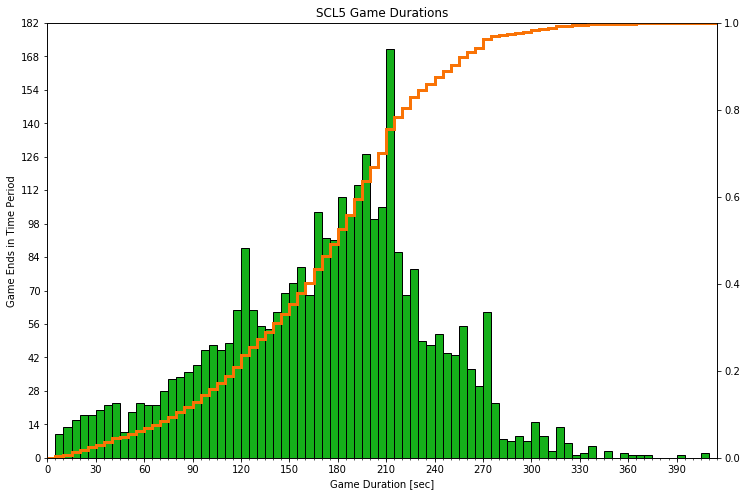

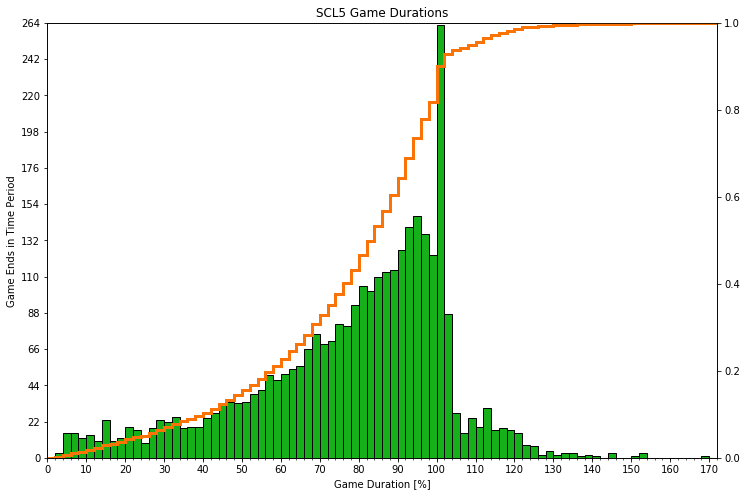

In [20]:
game_durations(scl5_replays, "SCL5 Game Durations")

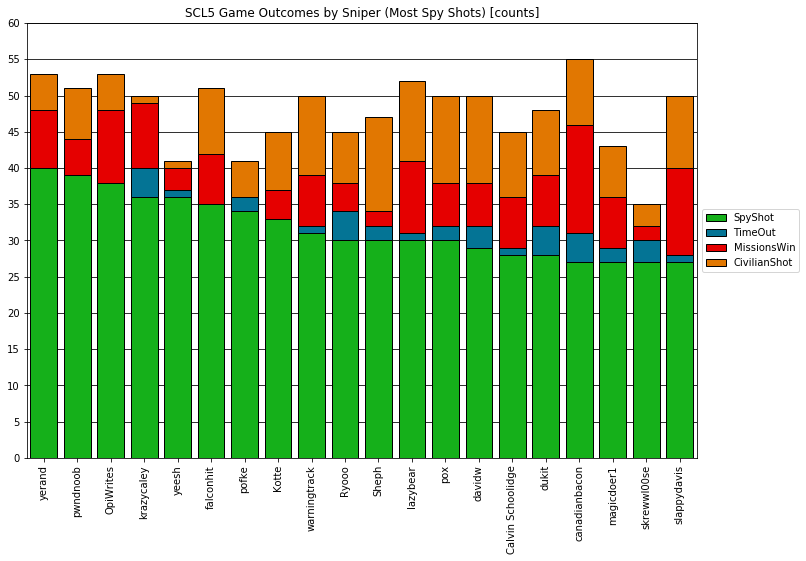

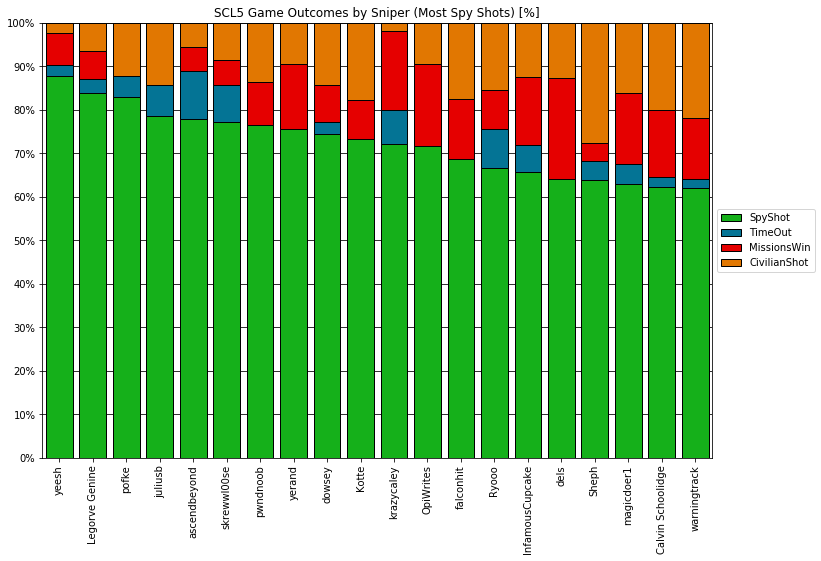

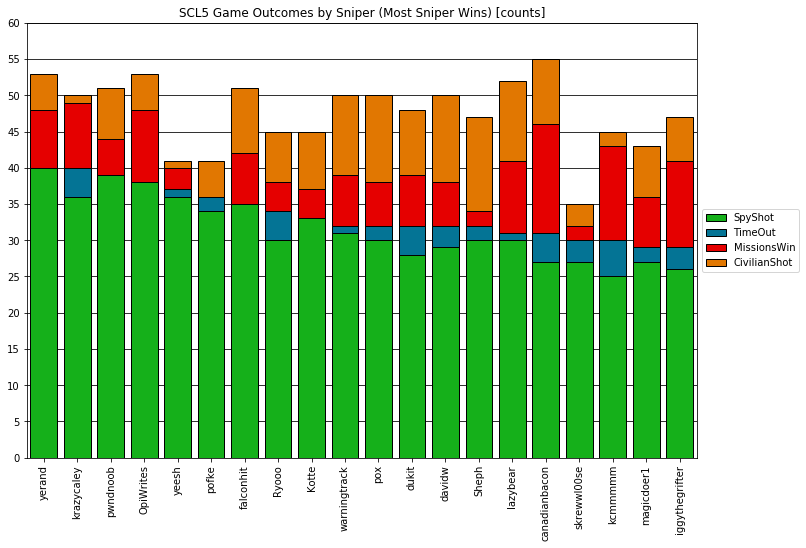

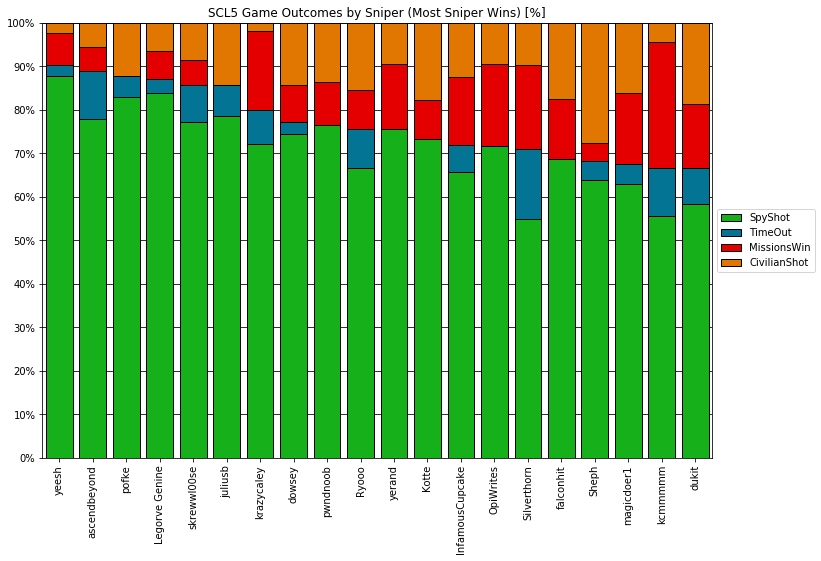

In [21]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Sniper (Most Spy Shots)",
    groupby=lambda g: g.sniper,
    category_data_order=WinType.SpyShot,
    data_stack_order = [WinType.SpyShot, WinType.TimeOut, WinType.MissionsWin, WinType.CivilianShot],
    limit=20
)
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Sniper (Most Sniper Wins)",
    groupby=lambda g: g.sniper,
    category_data_order=sort_by_sniper_wins,
    data_stack_order = [WinType.SpyShot, WinType.TimeOut, WinType.MissionsWin, WinType.CivilianShot],
    reversed_data_sort=True,
    limit=20
)

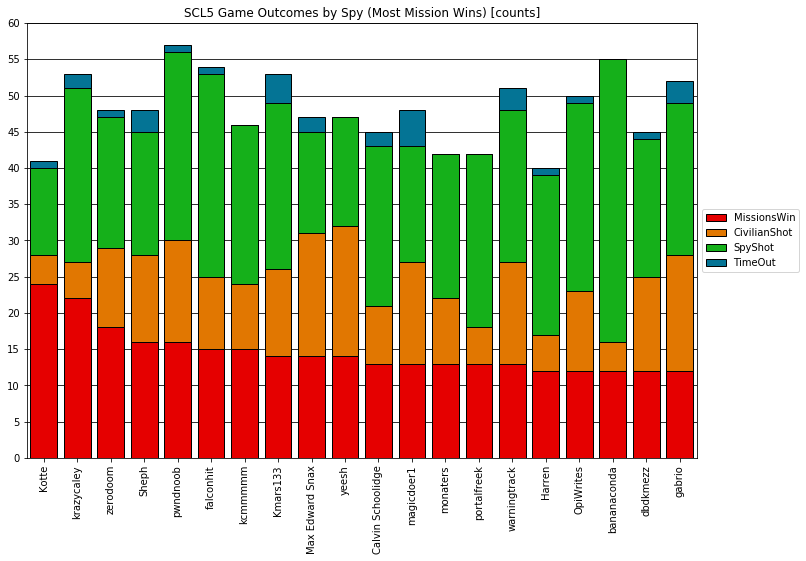

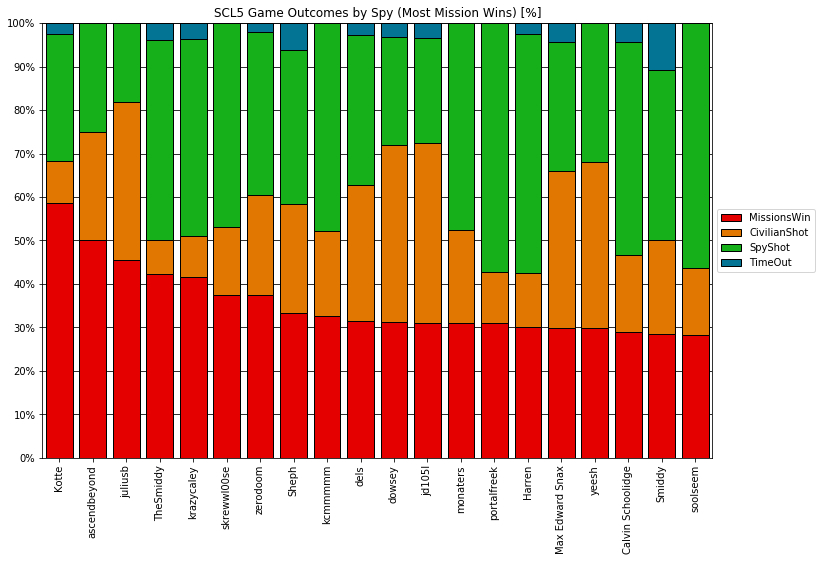

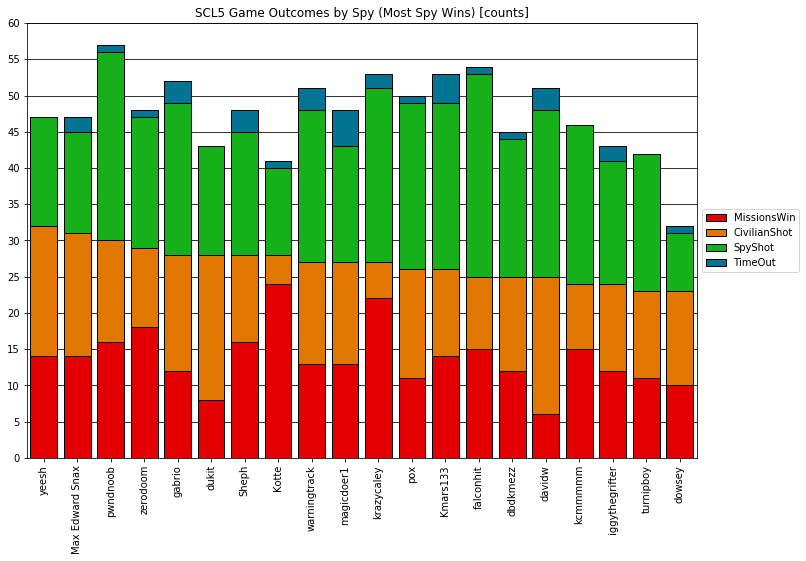

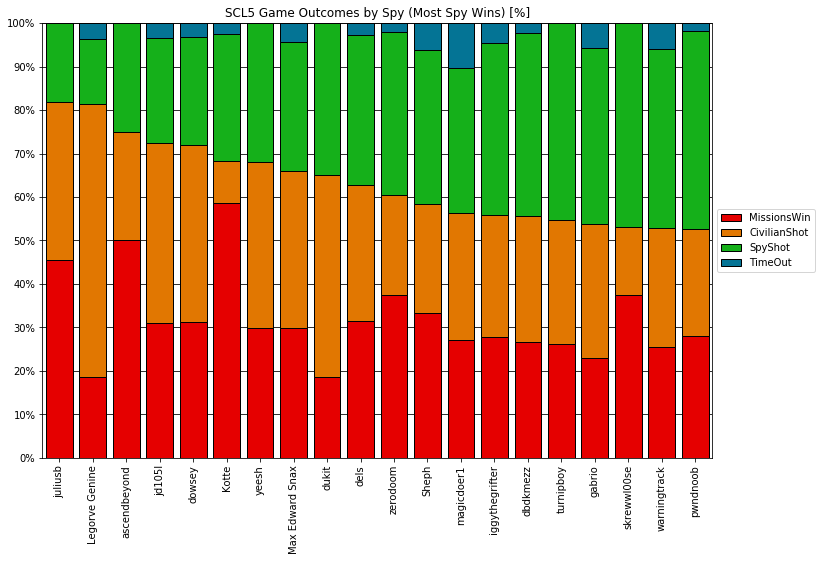

In [22]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Spy (Most Mission Wins)",
    groupby=lambda g: g.spy,
    category_data_order=WinType.MissionsWin,
    data_stack_order = [WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
    limit=20
)
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Spy (Most Spy Wins)",
    groupby=lambda g: g.spy,
    category_data_order=sort_by_spy_wins,
    data_stack_order = [WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
    reversed_data_sort=True,
    limit=20
)

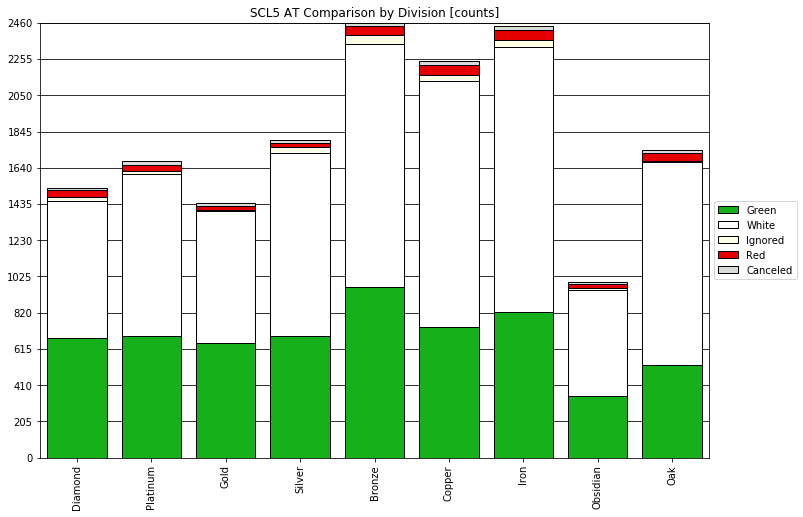

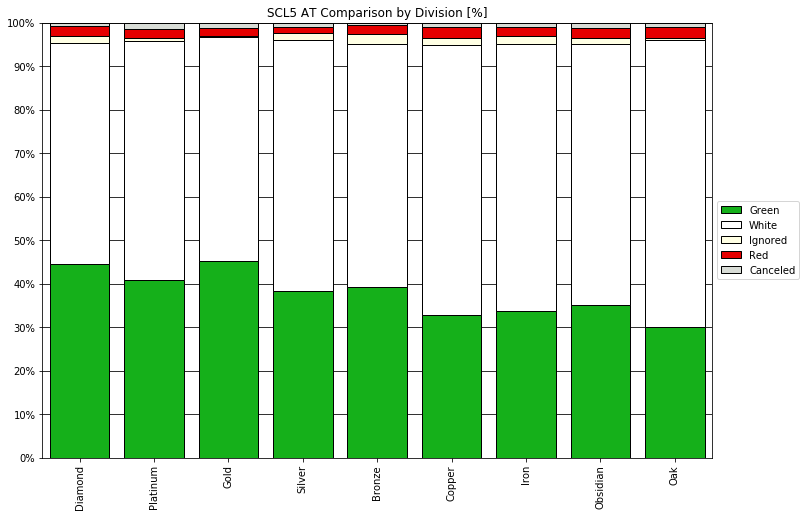

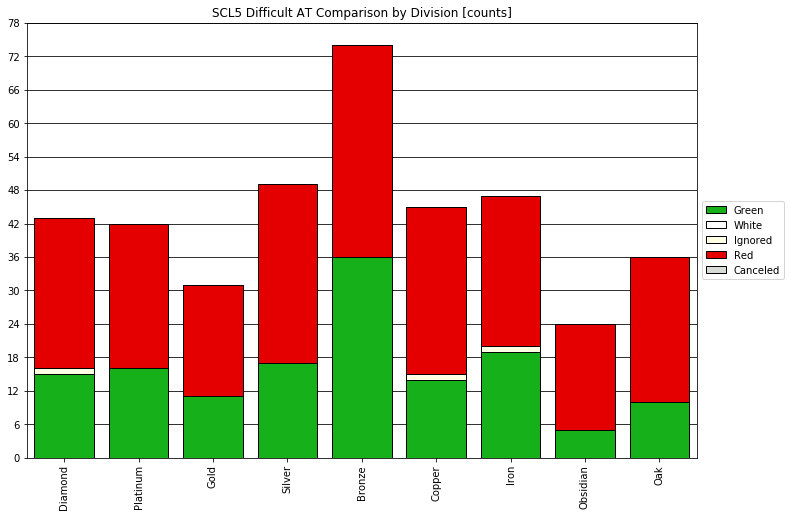

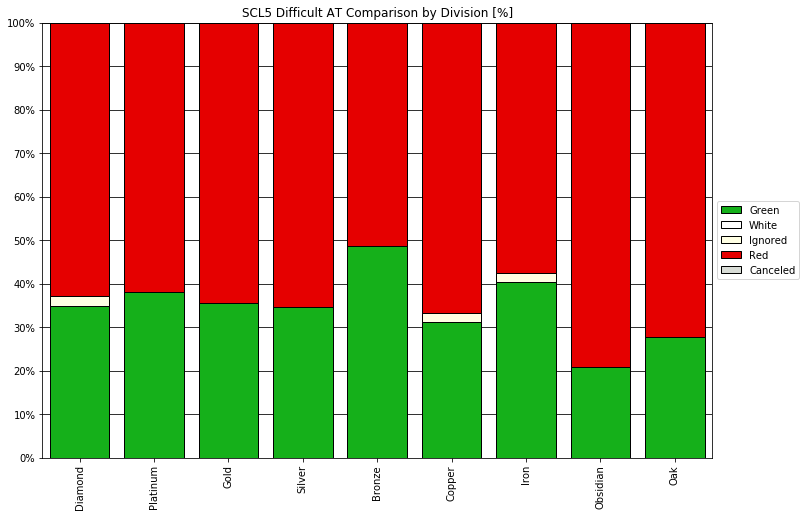

In [23]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda s: DIVISIONS.index(s),
)
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Difficult AT Comparison by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda s: DIVISIONS.index(s),
)

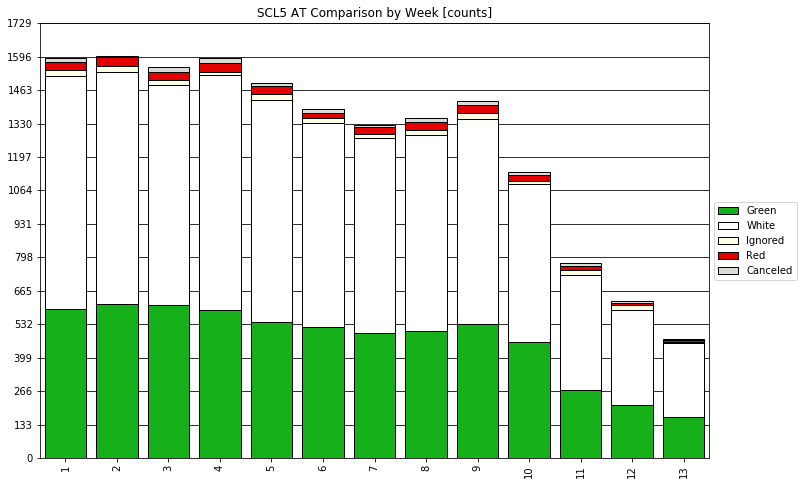

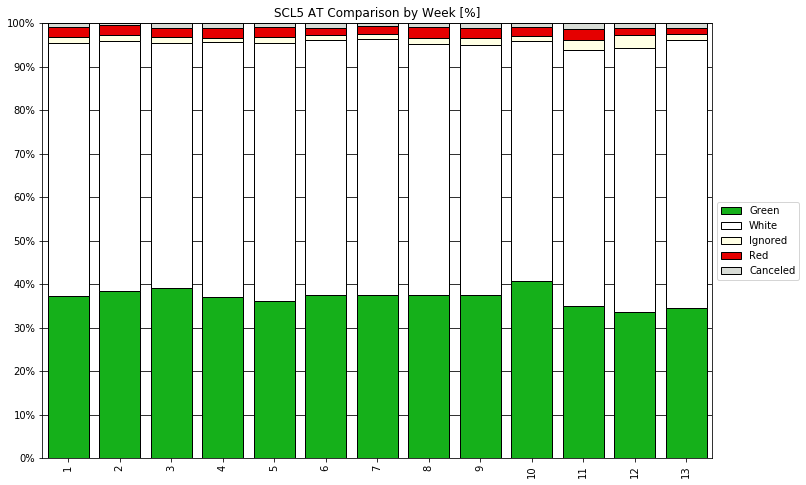

In [24]:
action_test_percentages(
    scl5_replays,
    'SCL5 AT Comparison by Week',
    groupby=lambda g: g.week,
)

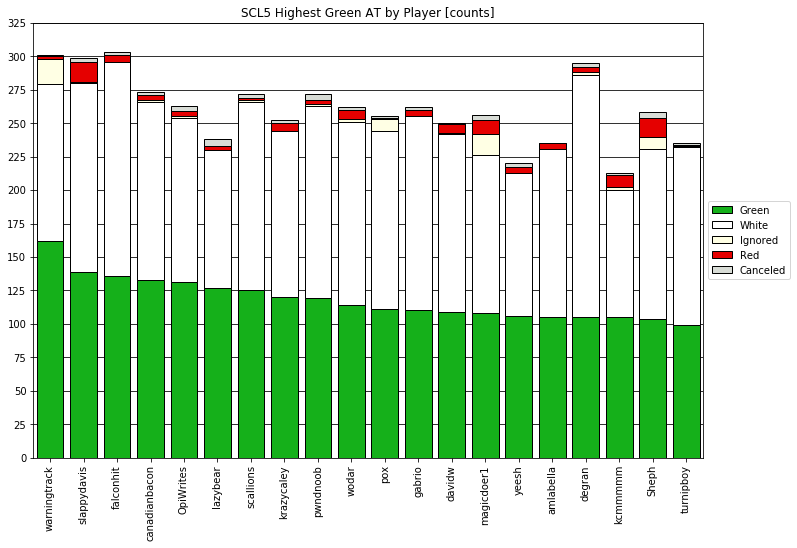

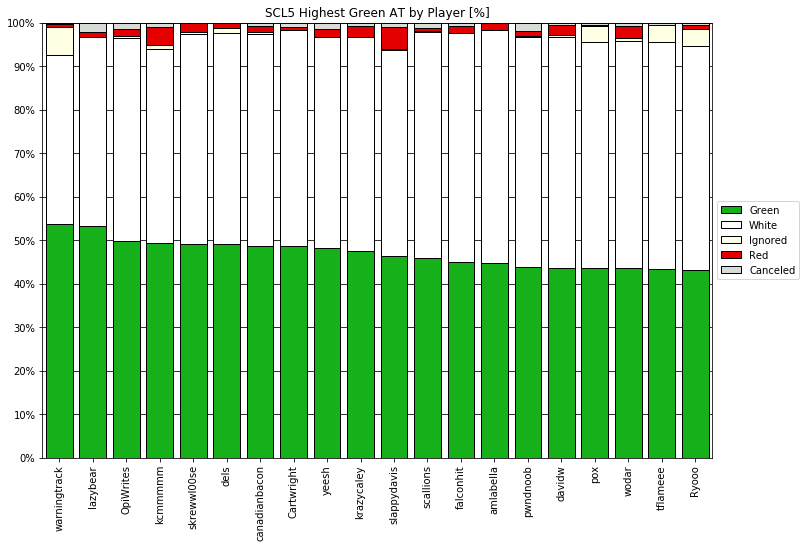

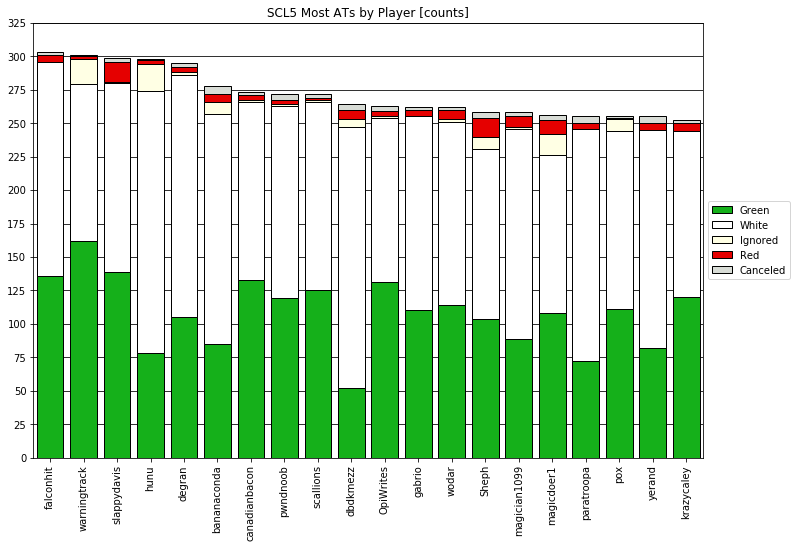

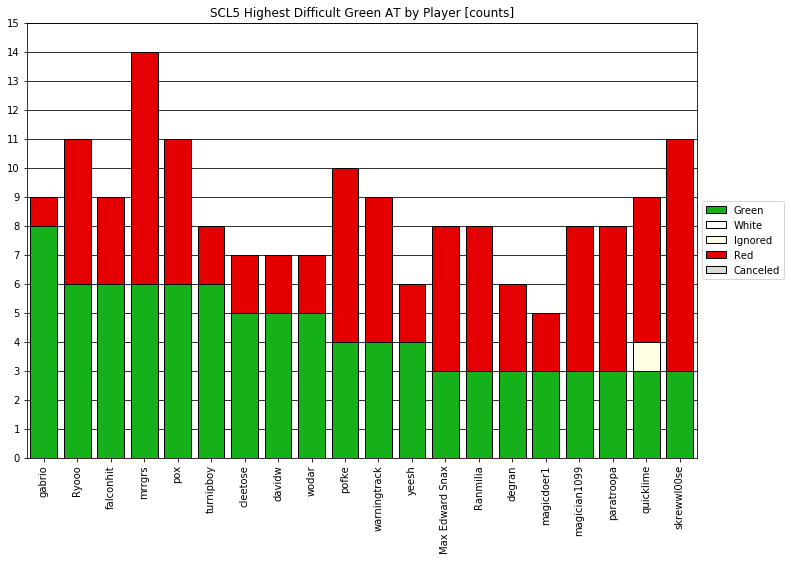

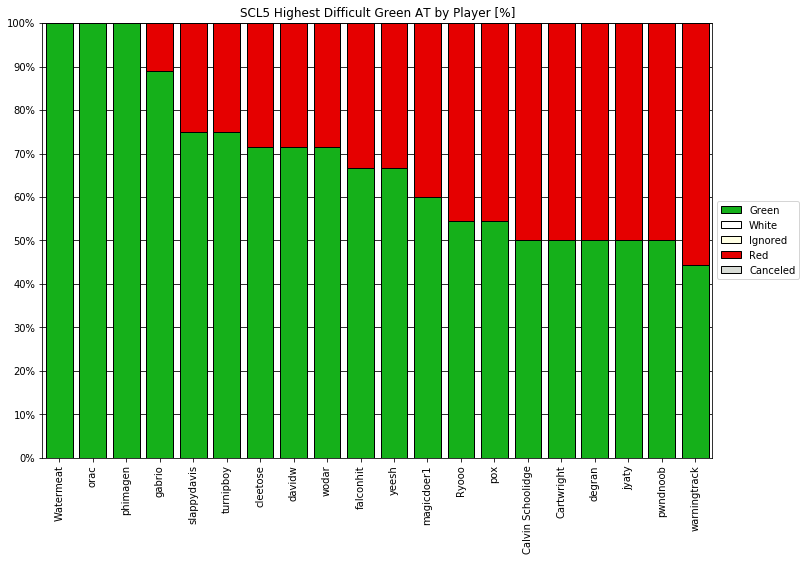

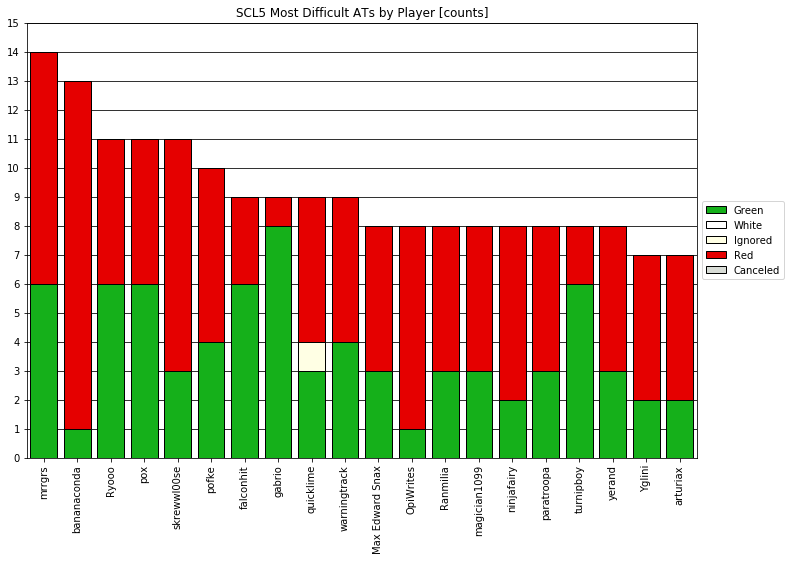

In [25]:
action_test_percentages(
    scl5_replays,
    'SCL5 Highest Green AT by Player',
    groupby=lambda g: g.spy,
    category_data_order=ActionTest.Green,
    limit=20
)
action_test_percentages(
    scl5_replays,
    'SCL5 Most ATs by Player',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=20,
    percentile_plot=False
)
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Highest Difficult Green AT by Player',
    groupby=lambda g: g.spy,
    category_data_order=ActionTest.Green,
    limit=20
)
diff_action_test_percentages(
    scl5_replays,
    'SCL5 Most Difficult ATs by Player',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=20,
    percentile_plot=False
)

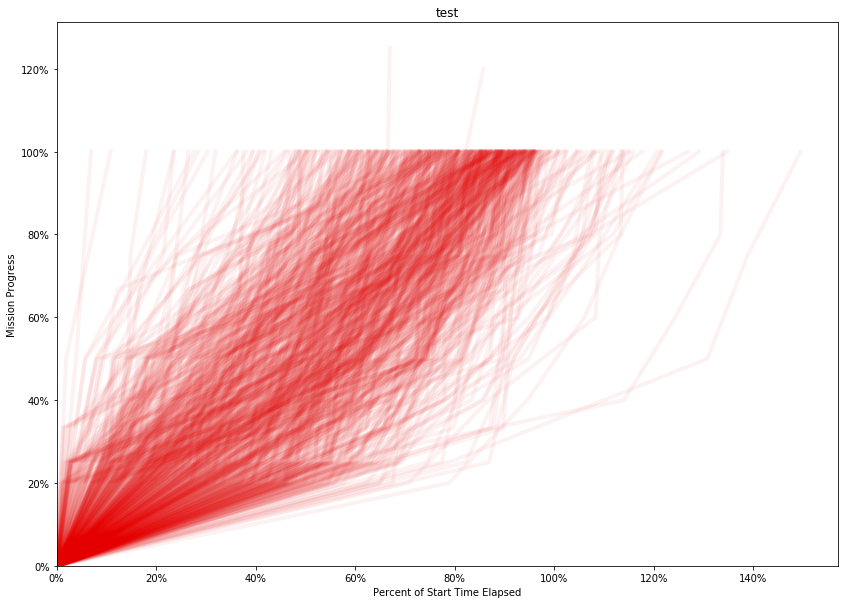

In [68]:
mission_progress(filter(lambda g: g.win_type == WinType.MissionsWin, scl5_replays), 'test')

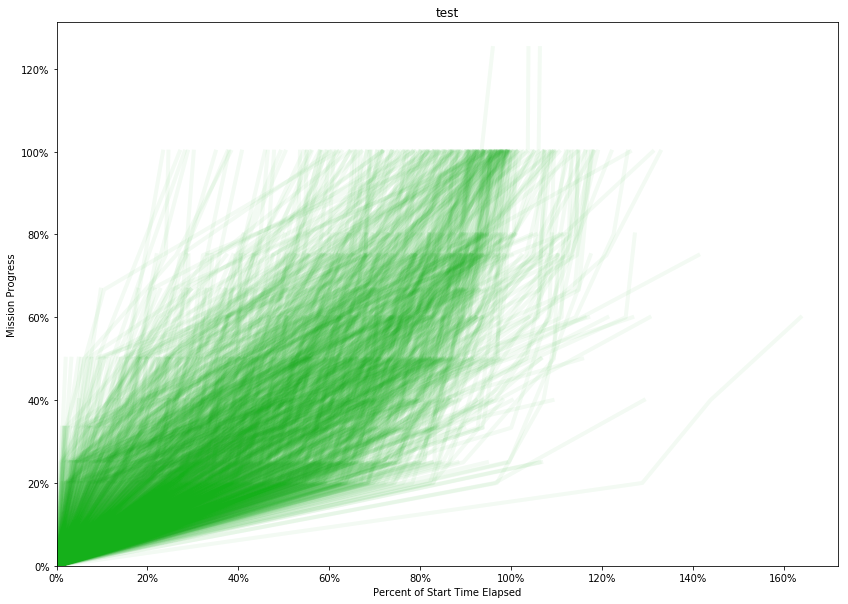

In [69]:
mission_progress(filter(lambda g: g.win_type == WinType.SpyShot, scl5_replays), 'test')

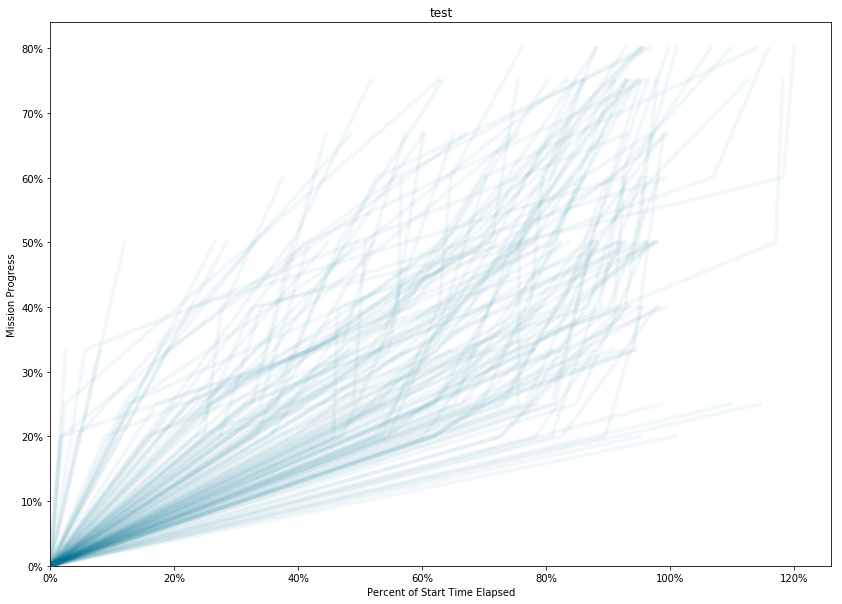

In [70]:
mission_progress(filter(lambda g: g.win_type == WinType.TimeOut, scl5_replays), 'test')

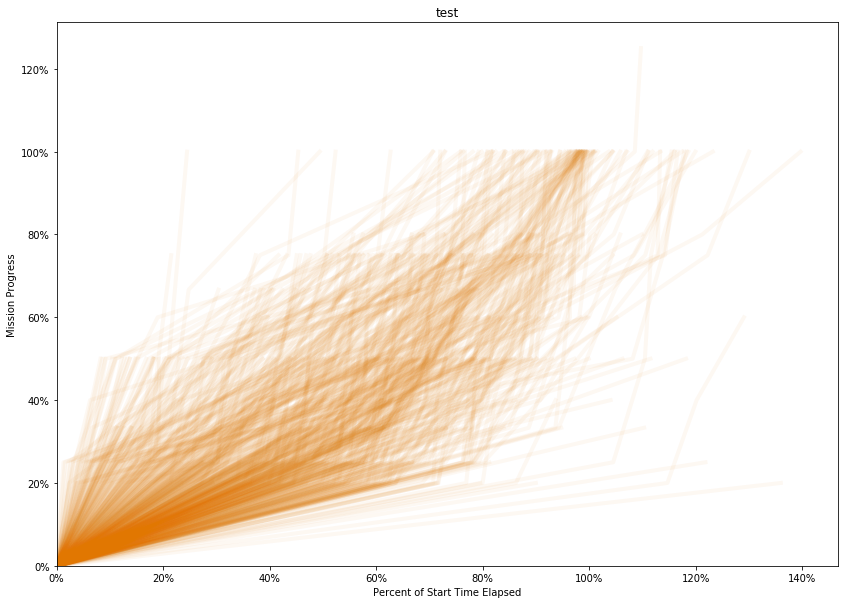

In [71]:
mission_progress(filter(lambda g: g.win_type == WinType.CivilianShot, scl5_replays), 'test')

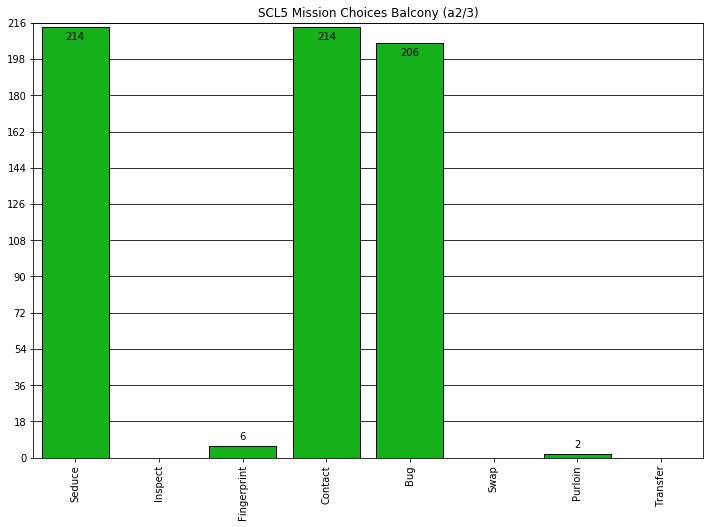

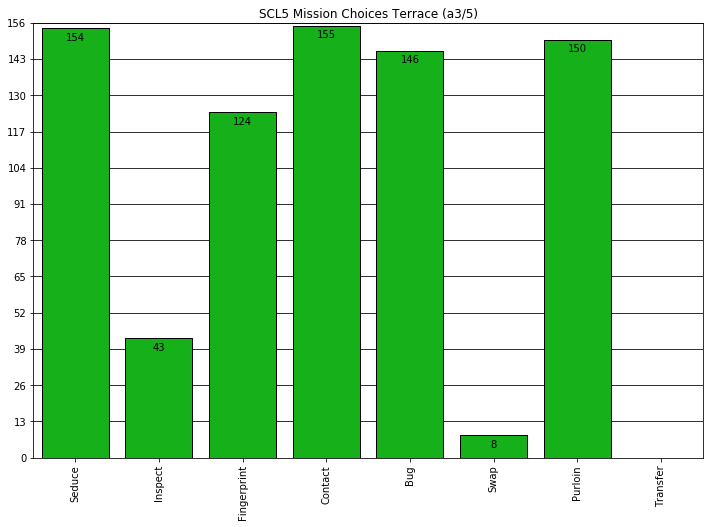

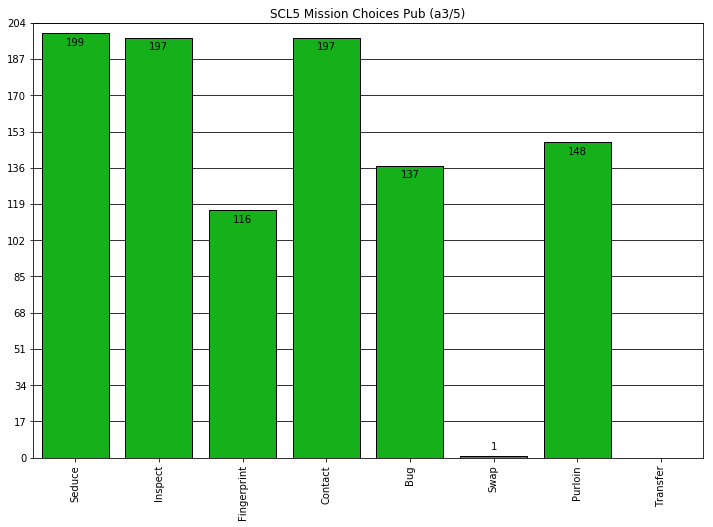

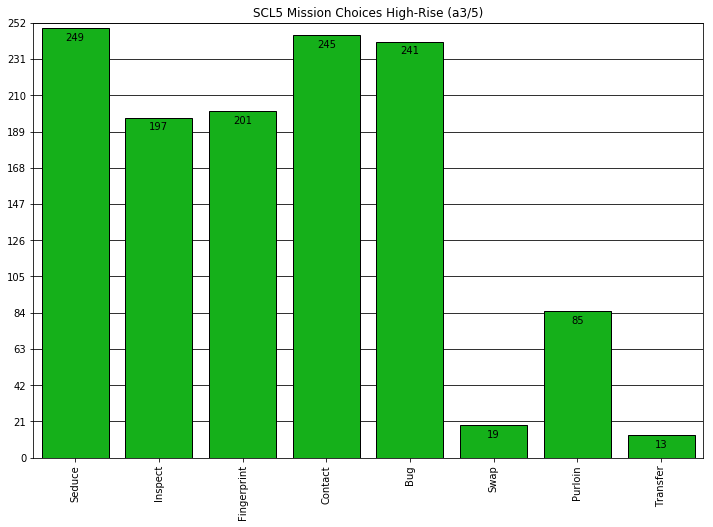

In [30]:
for venue, mode in SCL5_PICK_MODES.items():
    venue_games = filter(lambda g: g.venue==venue, scl5_replays)
    mission_choices(venue_games,
                    f"SCL5 Mission Choices {venue} ({mode})",
                    force_bar=True,
                    category_data_order=sum,
                    percentile_plot=False)

In [31]:
def sort_char_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.values() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

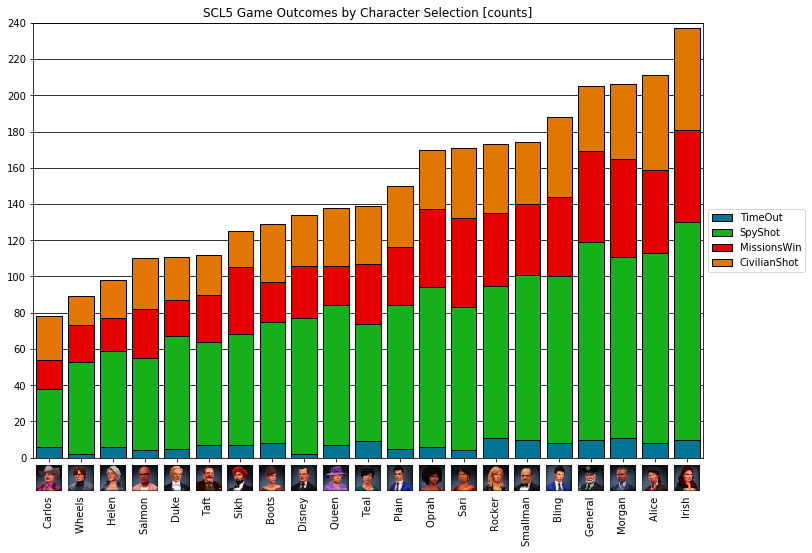

In [32]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sum,
    portrait_x_axis=True,
    reversed_data_sort=True,
    percentile_plot=False
)

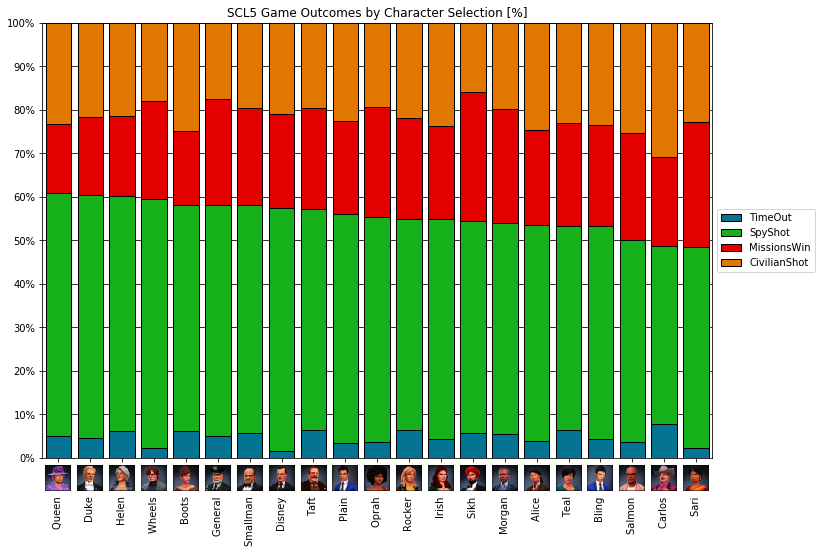

In [33]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sort_by_spy_wins,
    portrait_x_axis=True,
    counts_plot=False
)

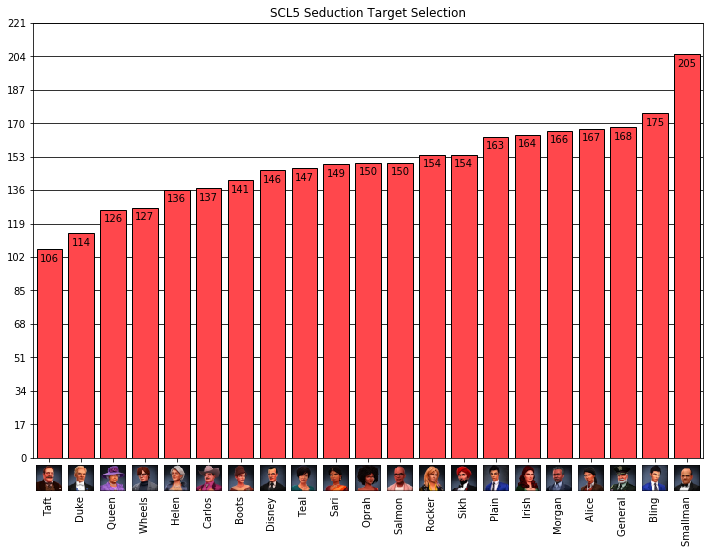

In [34]:
st_selection(scl5_replays, "SCL5 Seduction Target Selection", percentile_plot=False, category_data_order=sum)

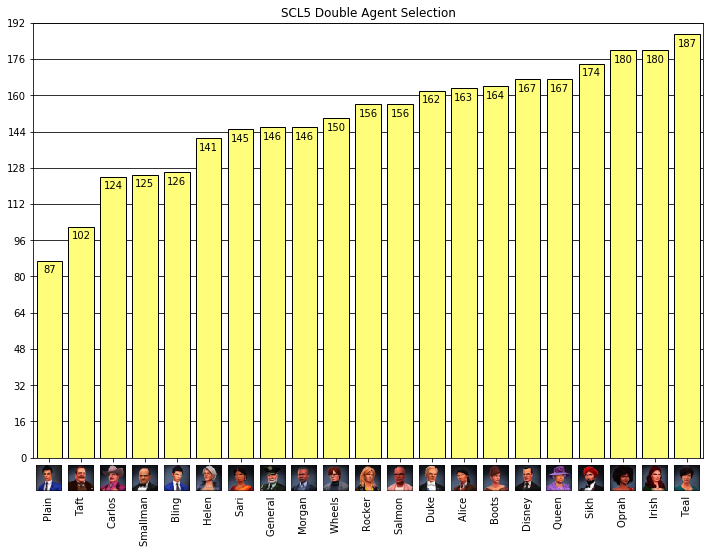

In [35]:
double_agent_selection(scl5_replays, "SCL5 Double Agent Selection", percentile_plot=False, category_data_order=sum)

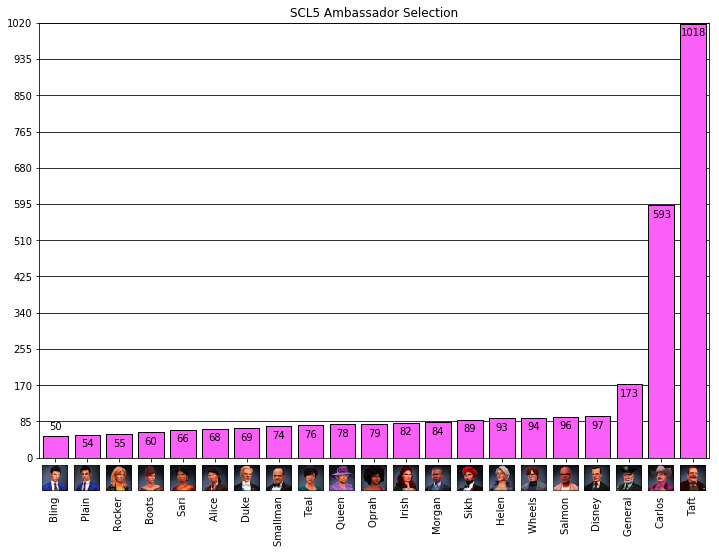

In [36]:
amba_selection(scl5_replays, "SCL5 Ambassador Selection", percentile_plot=False, category_data_order=sum)

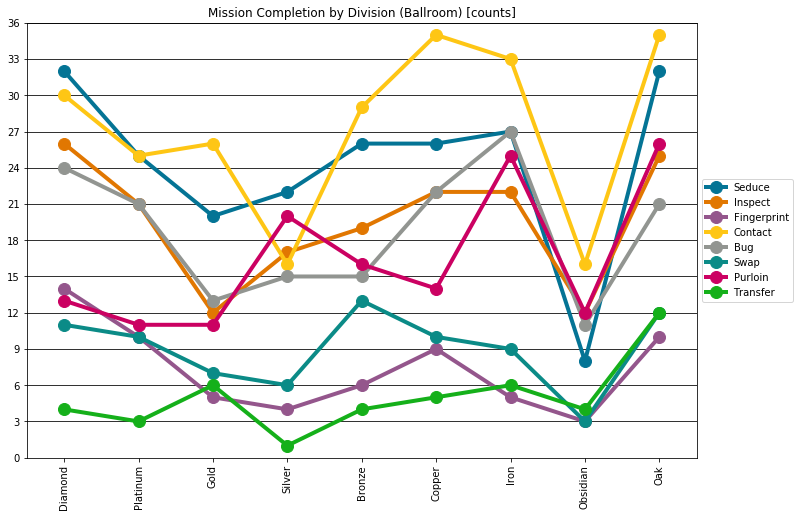

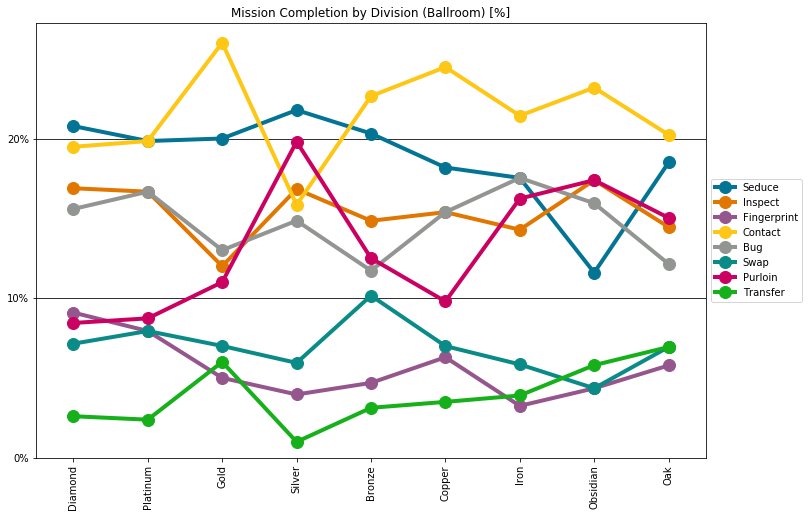

In [37]:
venue = 'Ballroom'
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue==venue, scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    f"Mission Completion by Division ({venue})",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g),
    force_line=True,
)

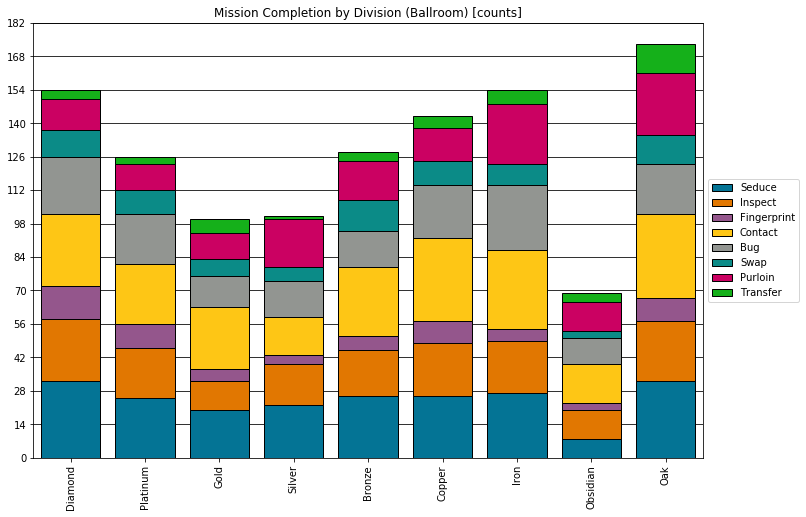

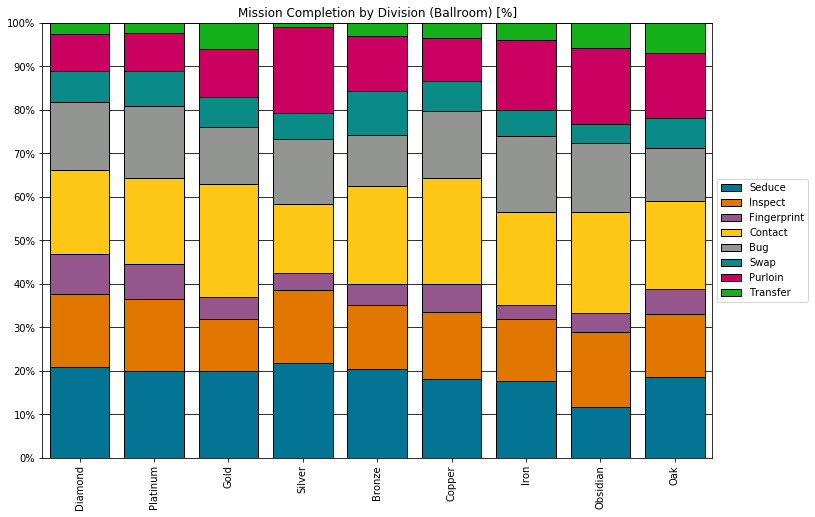

In [38]:
venue = 'Ballroom'
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue==venue, scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    f"Mission Completion by Division ({venue})",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

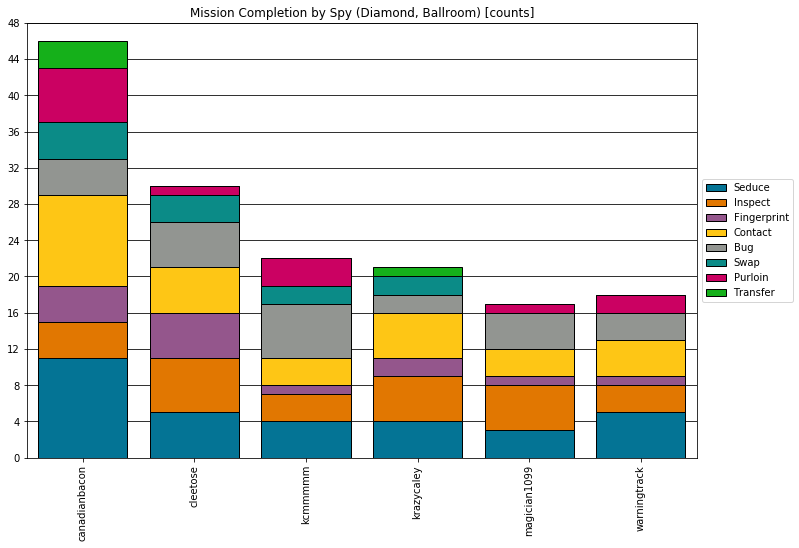

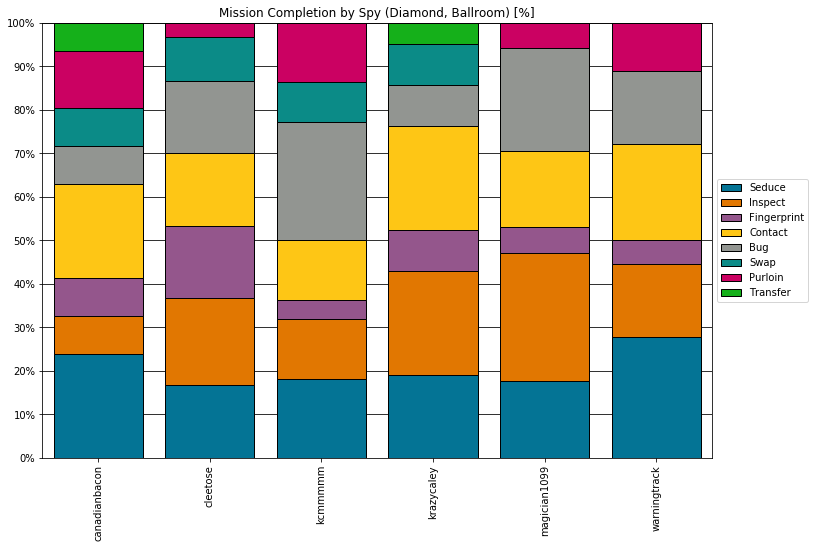

In [39]:
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.division == "Diamond" and g.venue=='Ballroom', scl5_replays))

mission_completion_query(
    scl5_mode_replays,
    "Mission Completion by Spy (Diamond, Ballroom)",
    groupby=lambda g: g.spy,
)

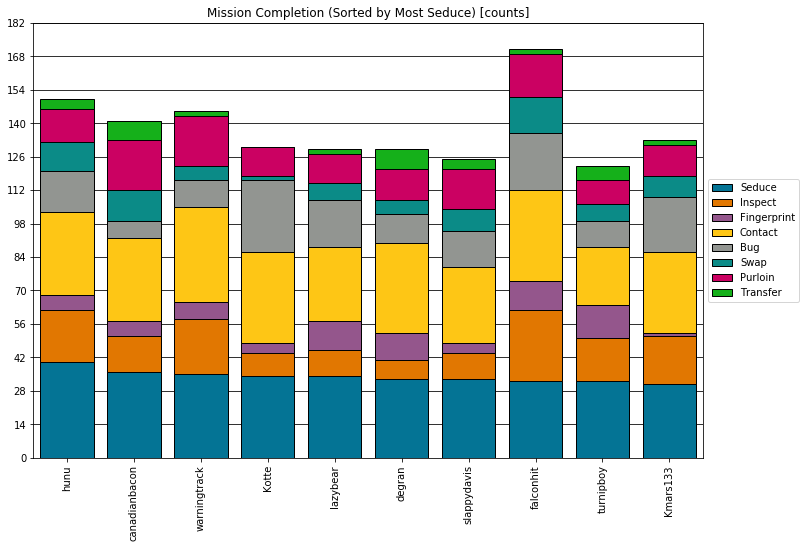

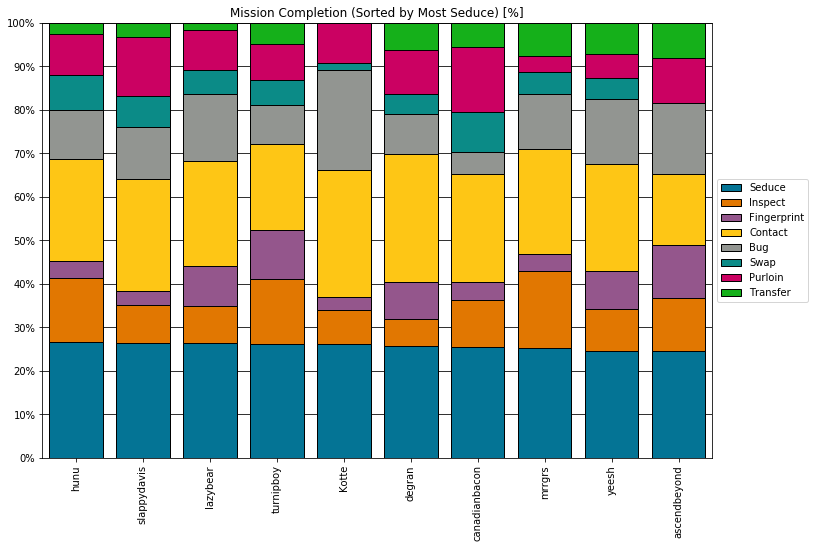

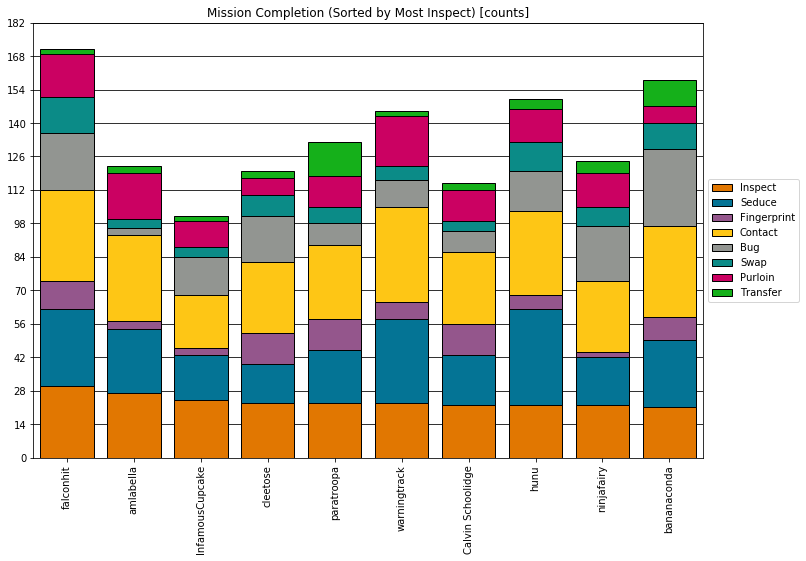

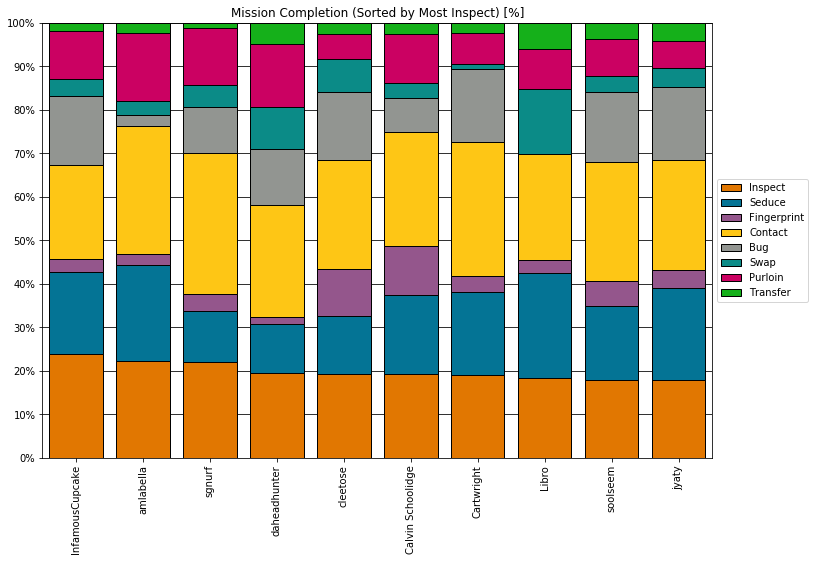

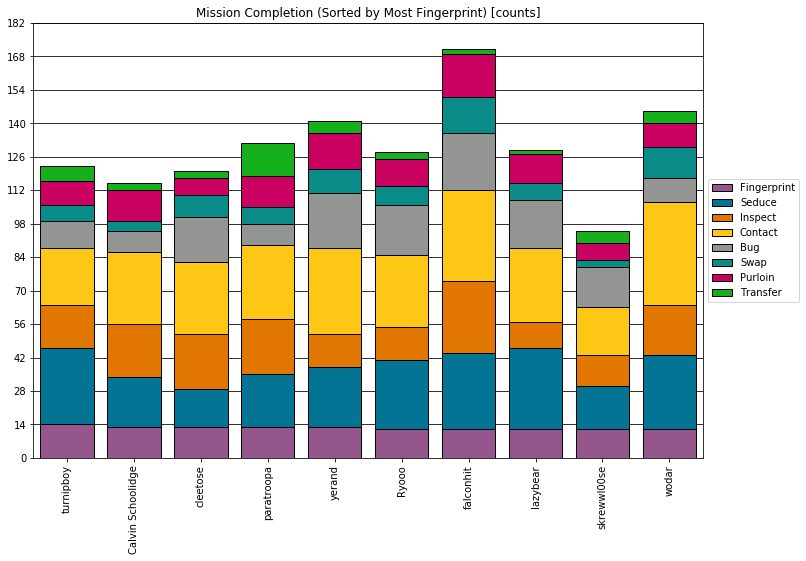

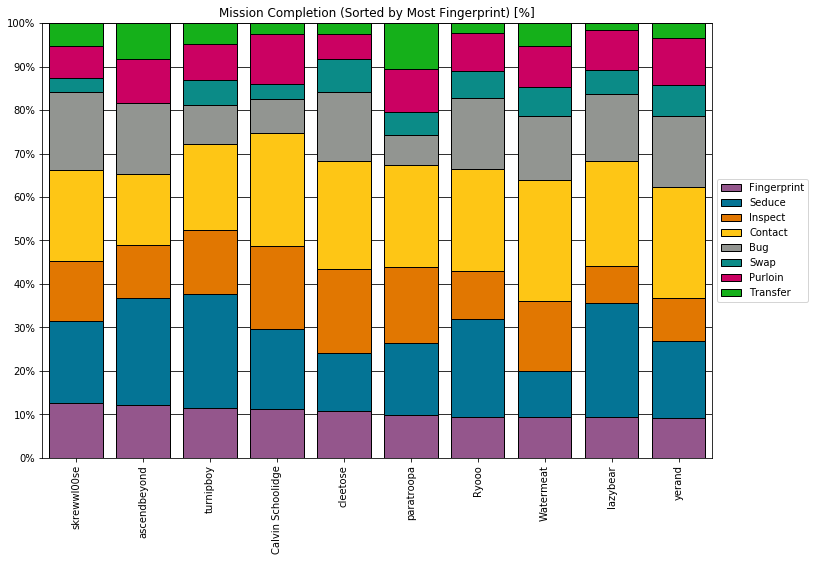

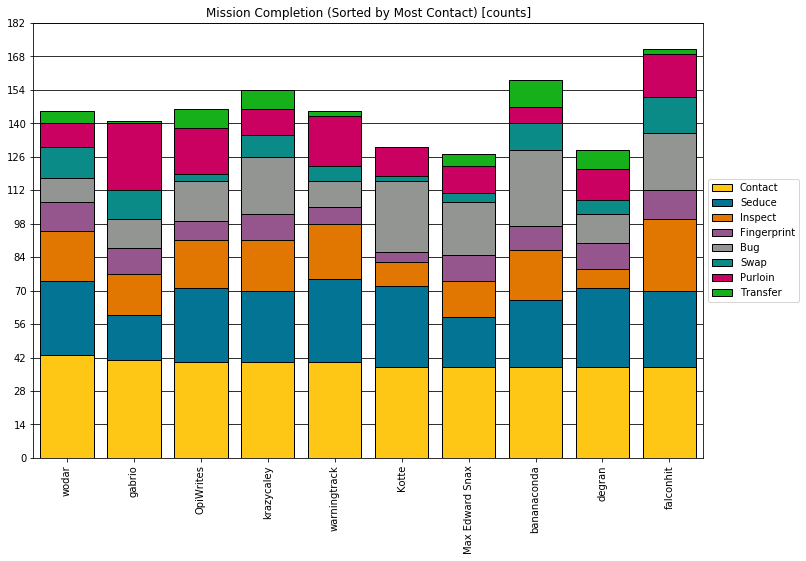

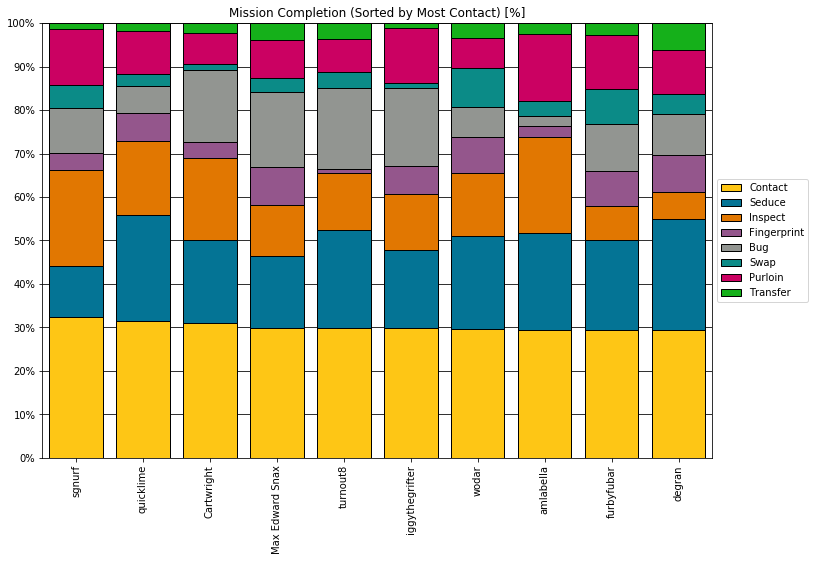

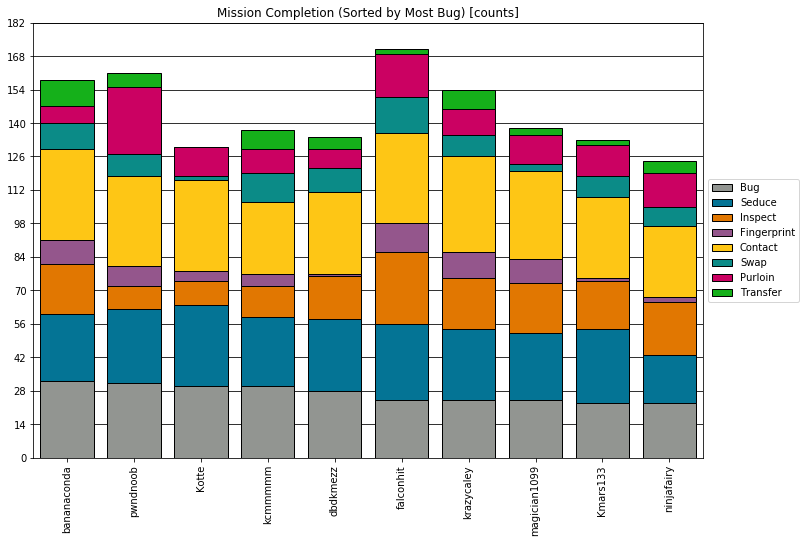

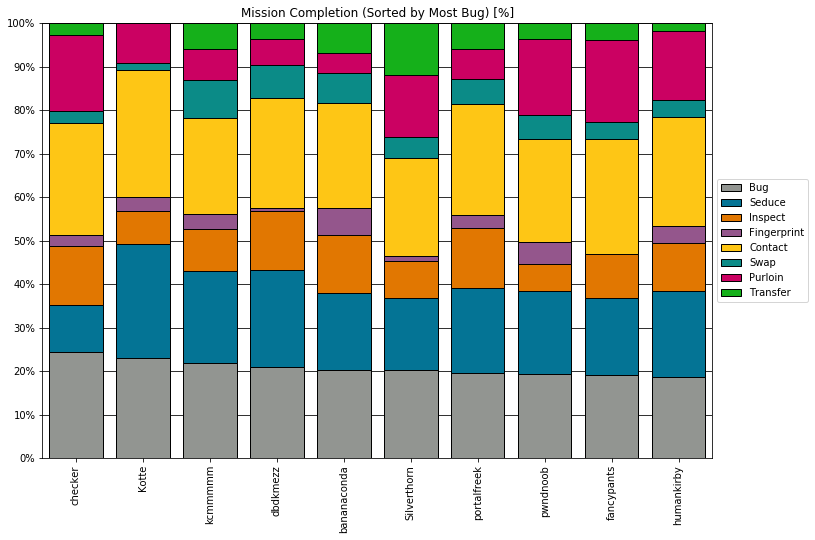

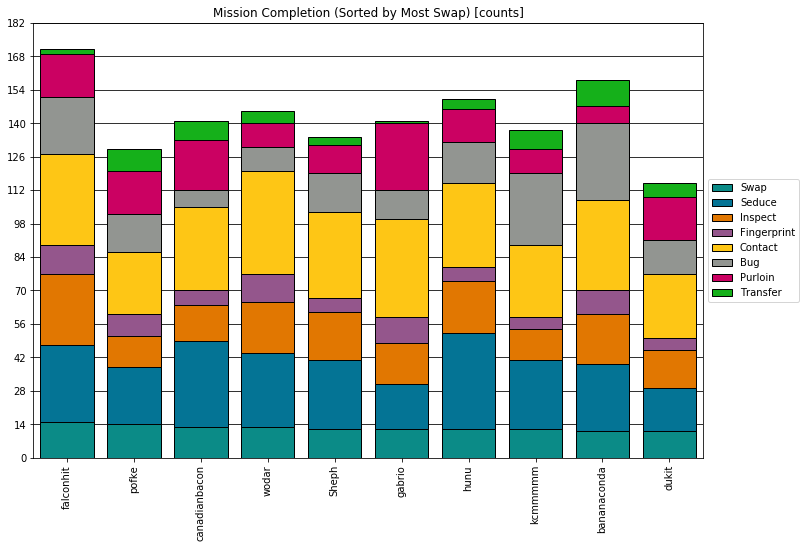

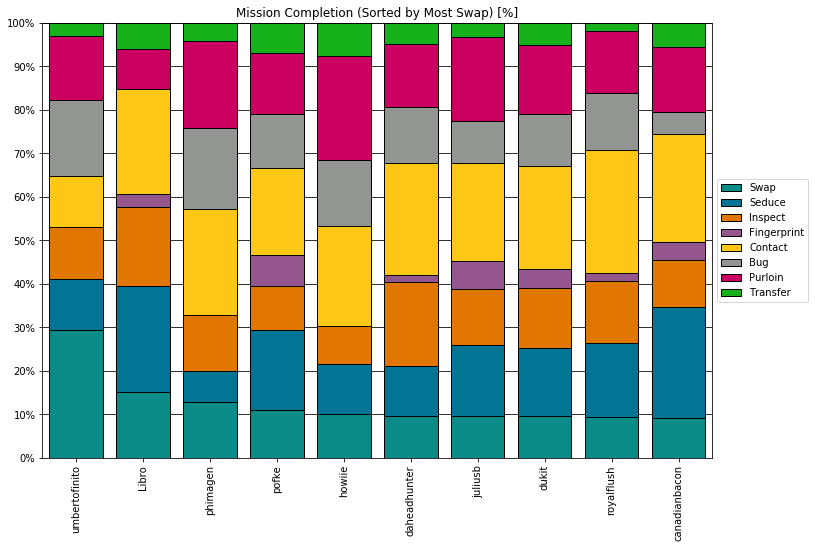

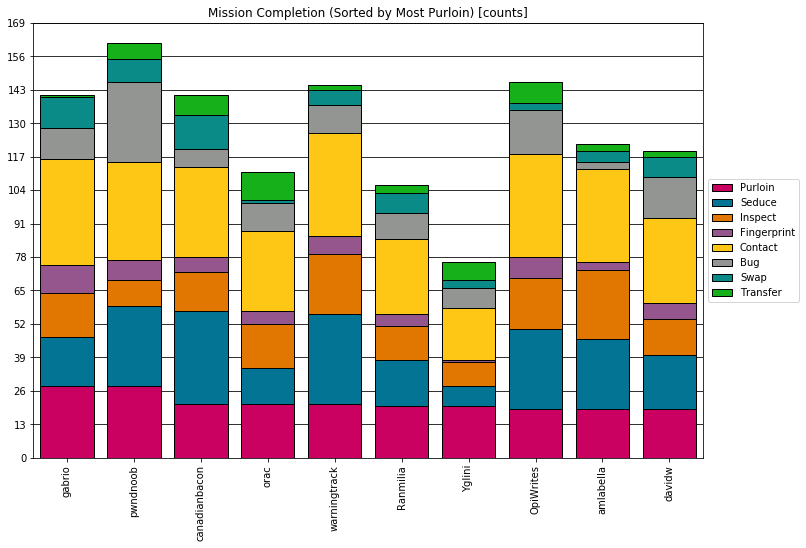

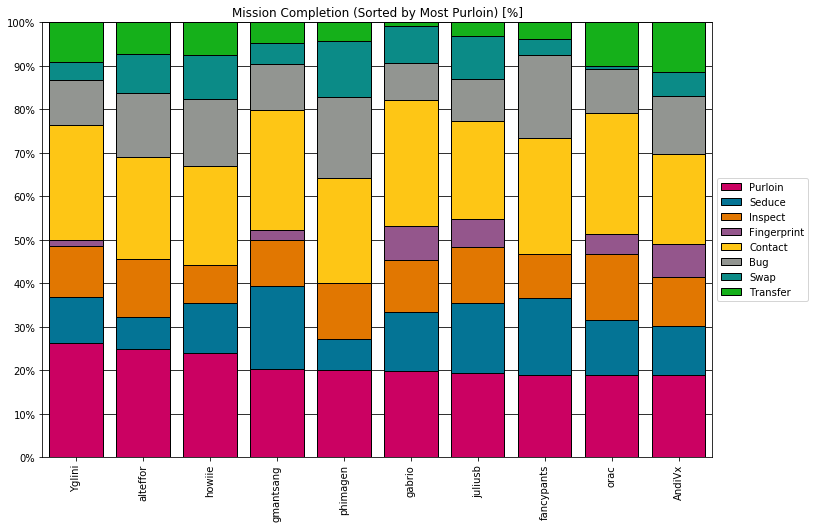

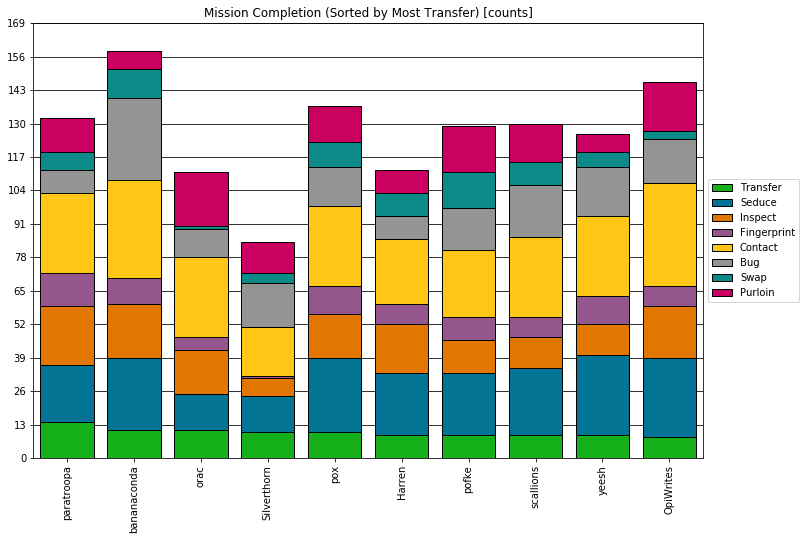

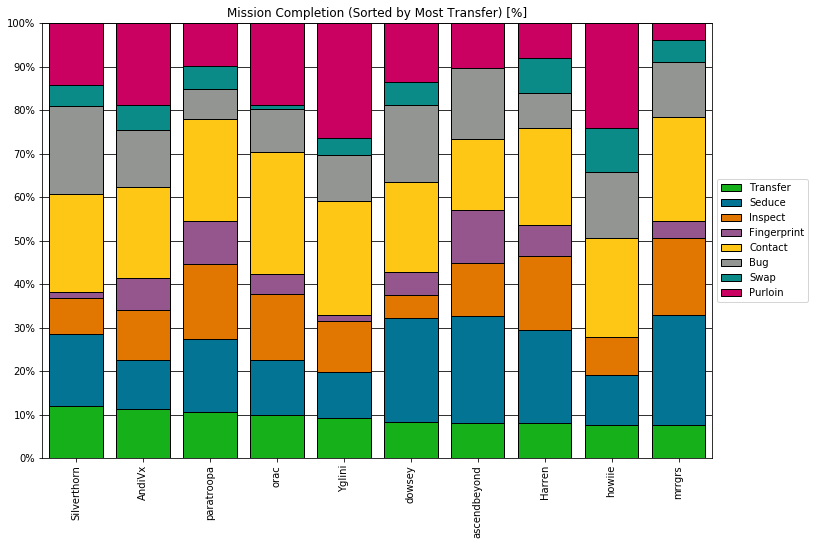

In [40]:
for m in Missions:
    if m != Missions.Zero:
        mission_completion_query(
            scl5_replays,
            f"Mission Completion (Sorted by Most {m.name})",
            groupby=lambda g: g.spy,
            category_data_order = m,
            data_stack_order = sorted([__m for __m in Missions if __m != Missions.Zero], key=lambda _m: _m != m),
            limit=10,
        )

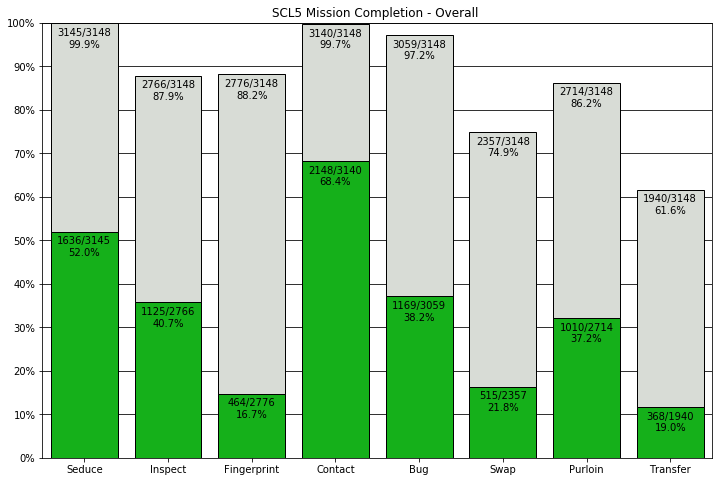

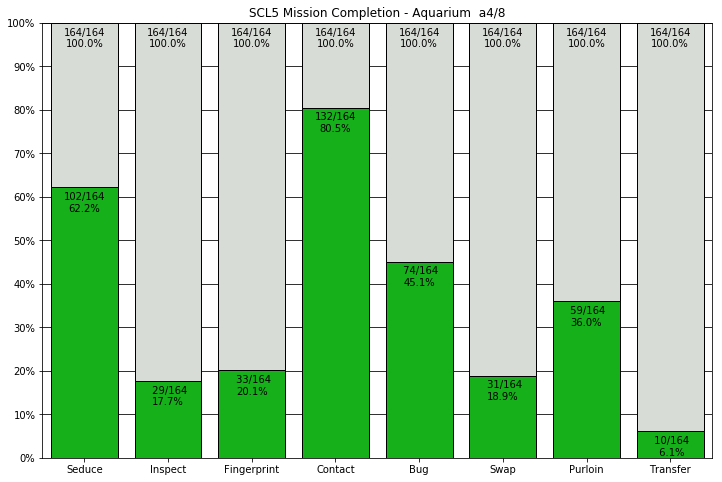

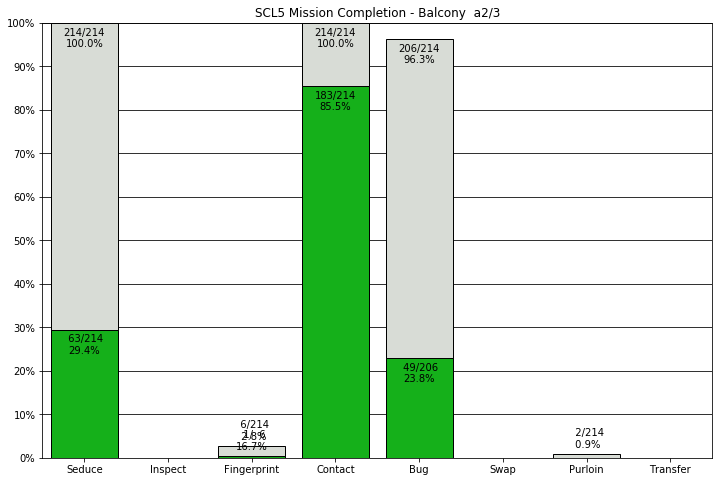

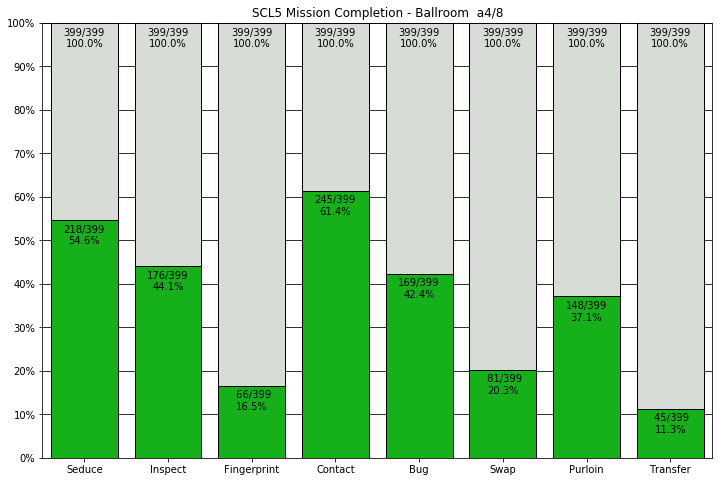

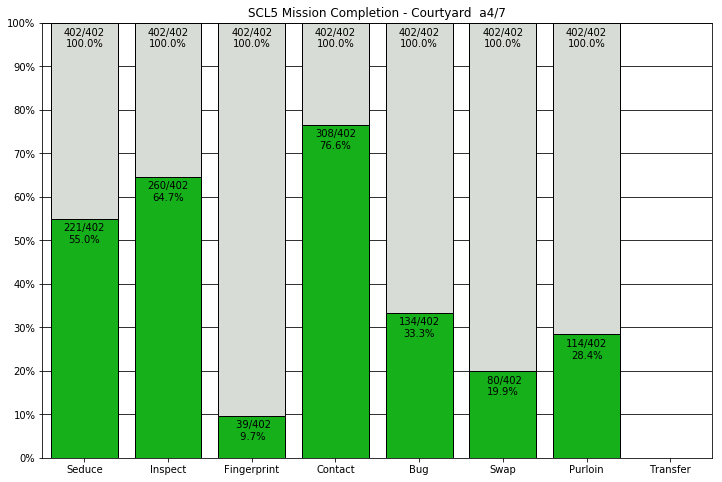

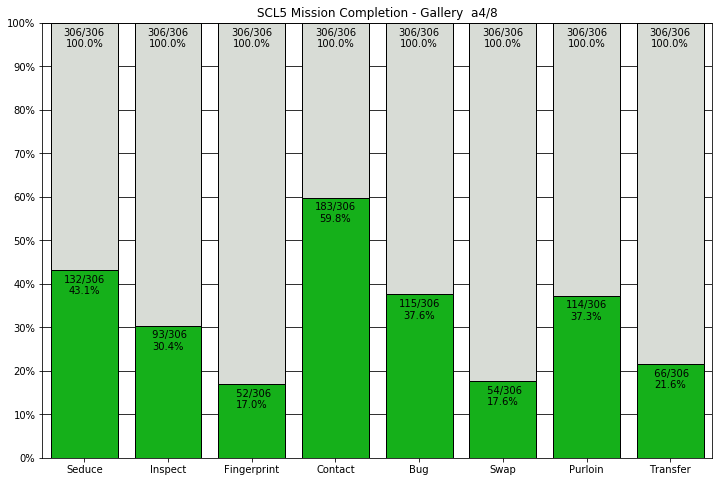

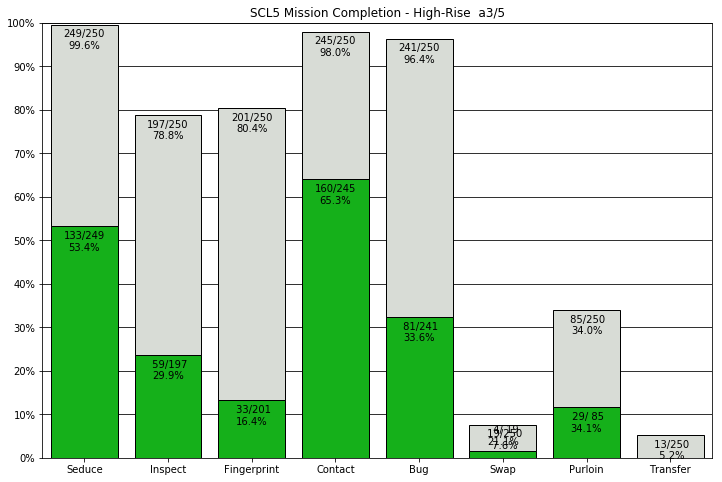

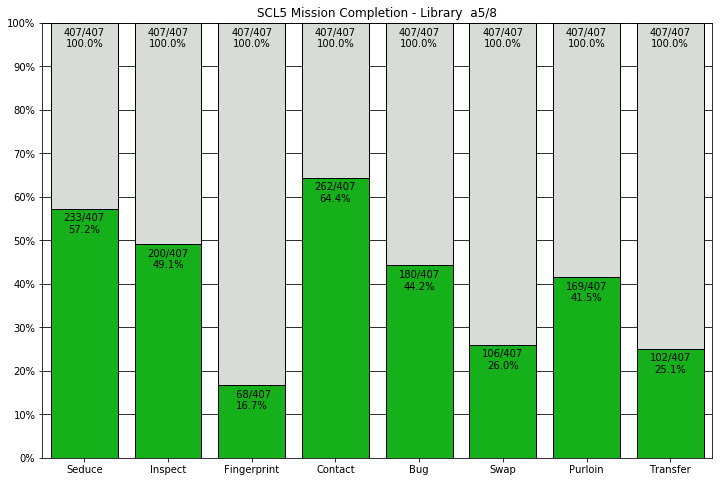

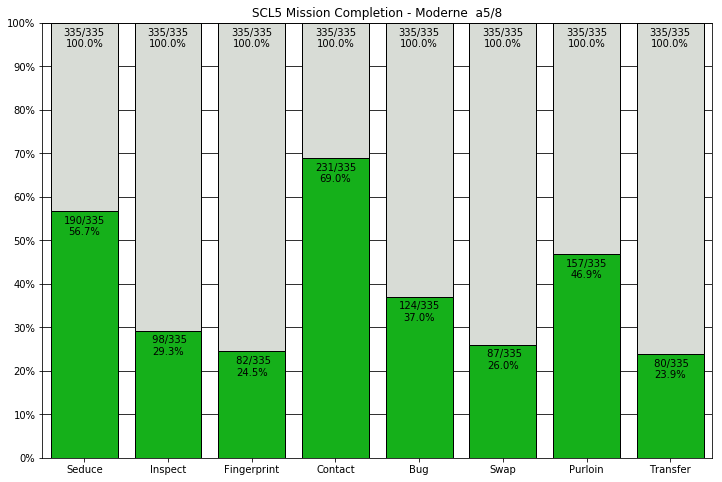

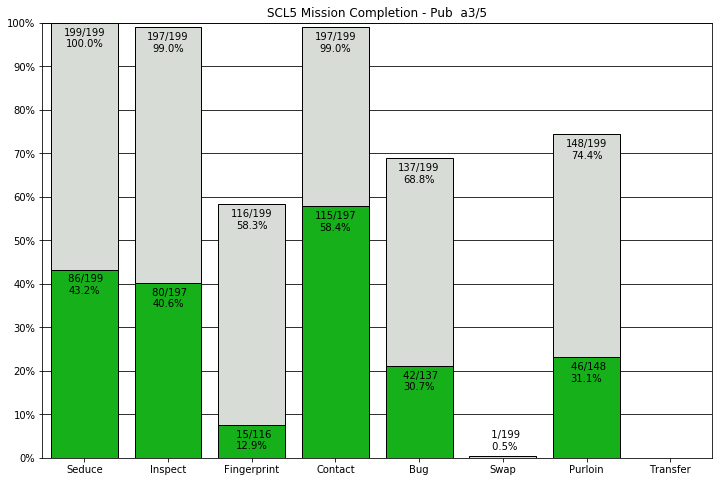

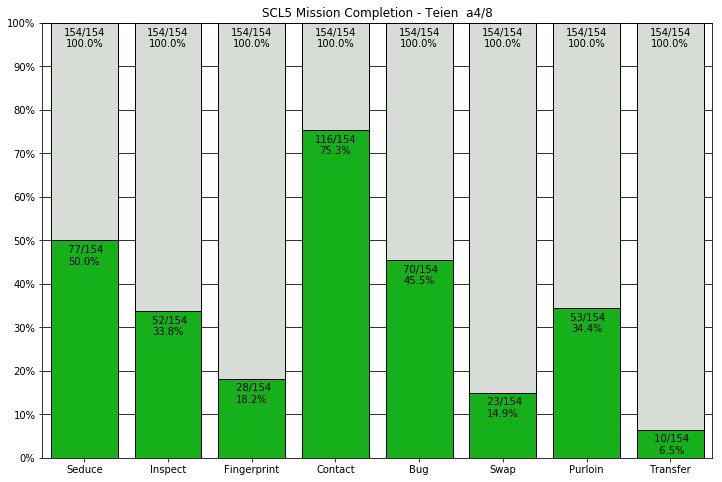

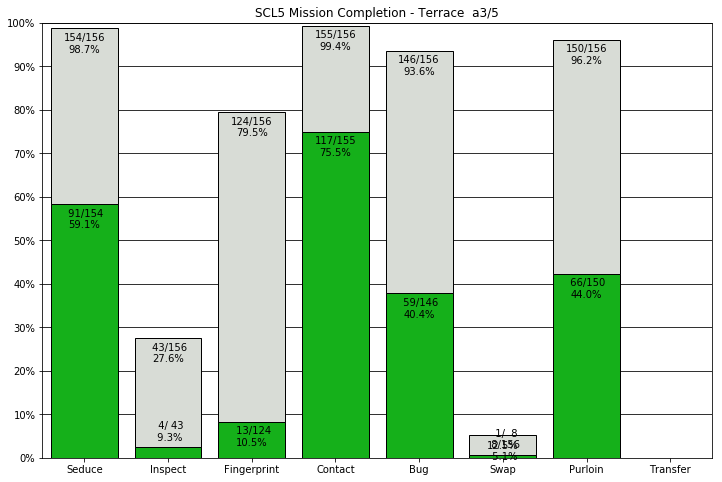

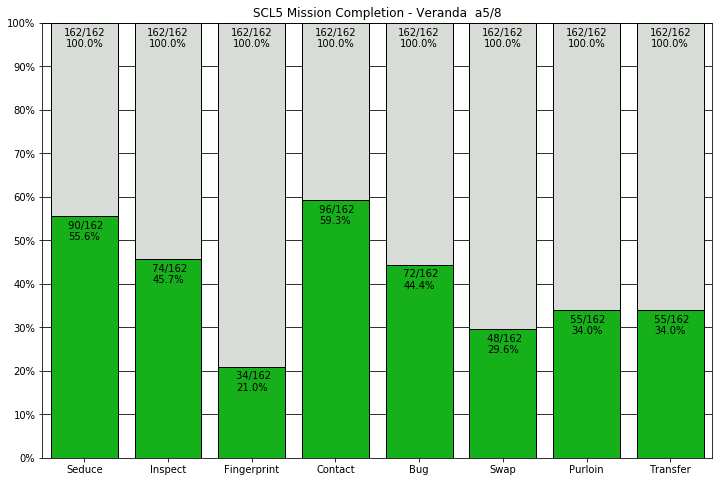

In [41]:
mission_completion(scl5_replays, "SCL5 Mission Completion", SCL5_VENUE_MODES)

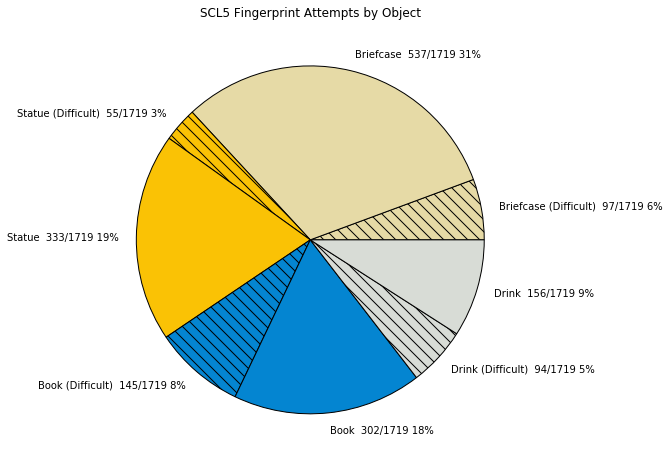

In [42]:
attempted_fingerprint_sources(scl5_replays, "SCL5 Fingerprint Attempts by Object")

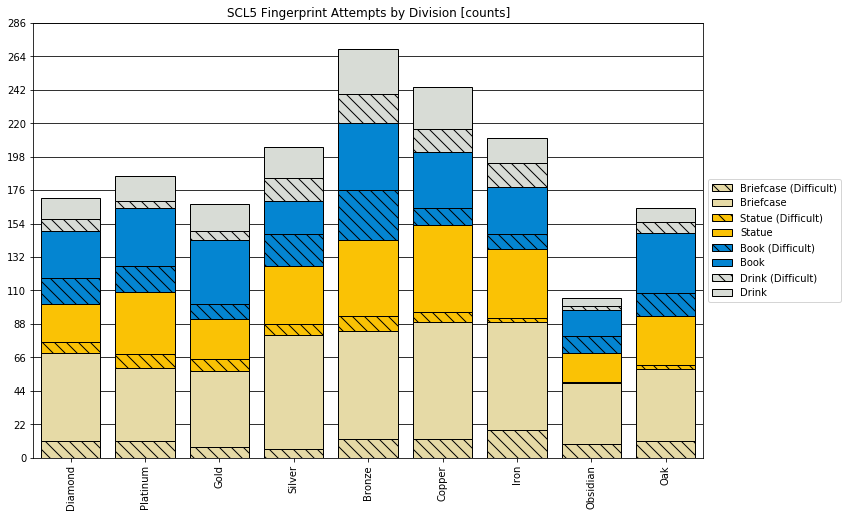

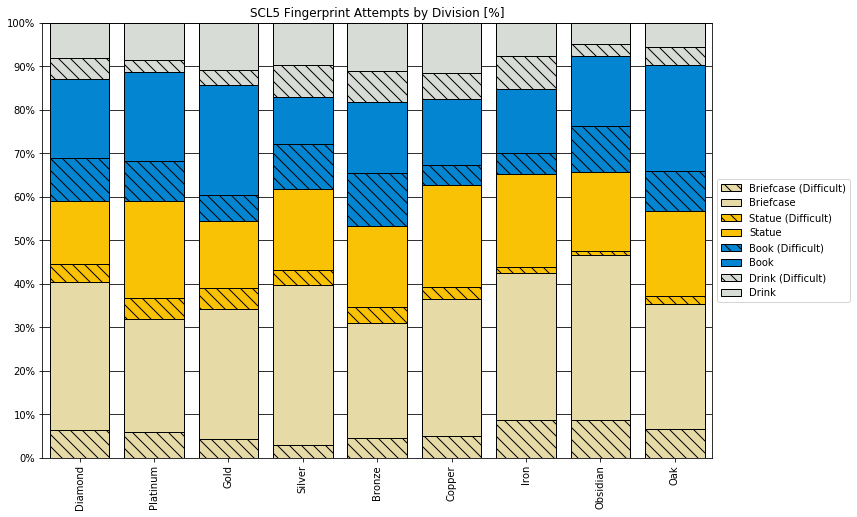

In [43]:
attempted_fingerprint_sources(
    scl5_replays,
    "SCL5 Fingerprint Attempts by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

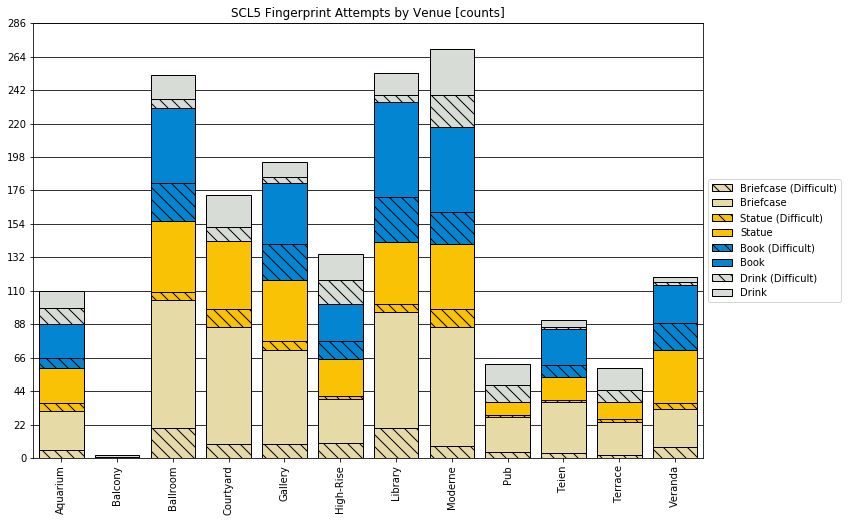

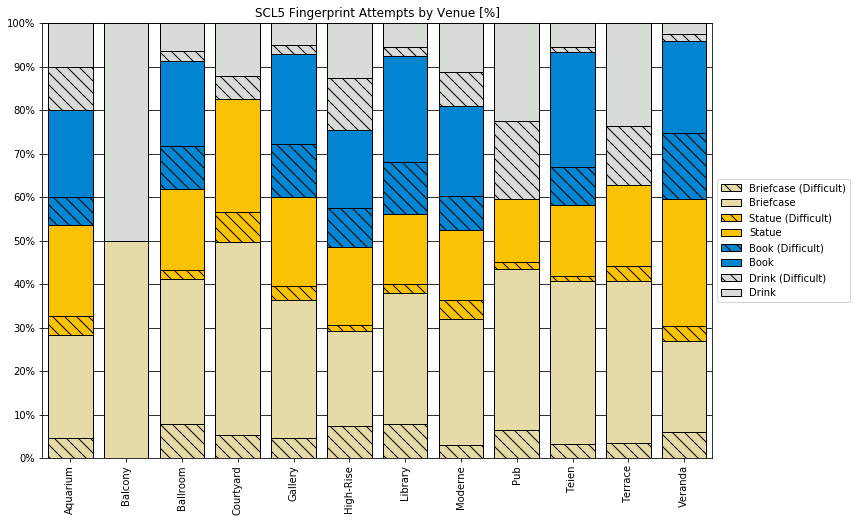

In [44]:
attempted_fingerprint_sources(
    scl5_replays,
    "SCL5 Fingerprint Attempts by Venue",
    groupby=lambda g: g.venue,
)

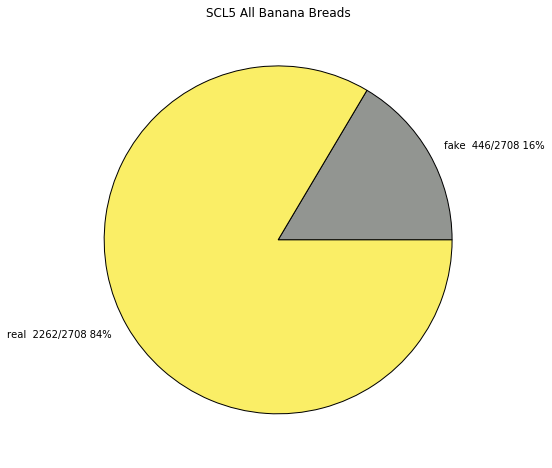

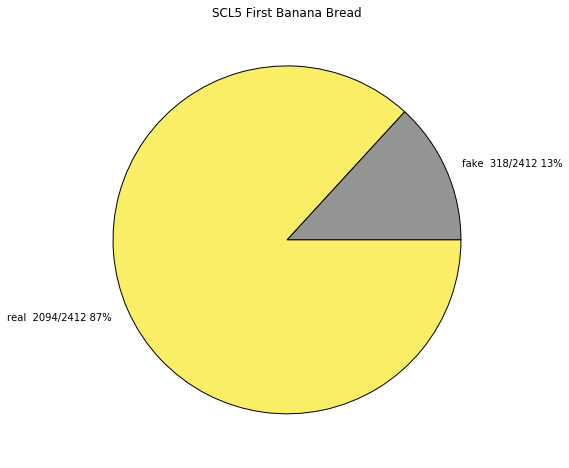

In [45]:
all_banana_bread_percentages(scl5_replays, "SCL5 All Banana Breads")
first_banana_bread_percentages(scl5_replays, "SCL5 First Banana Bread")

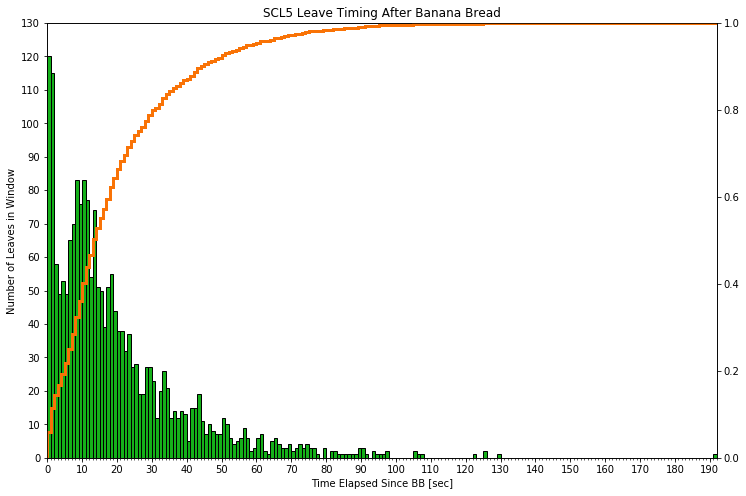

In [46]:
banana_split(scl5_replays, "SCL5 Leave Timing After Banana Bread")

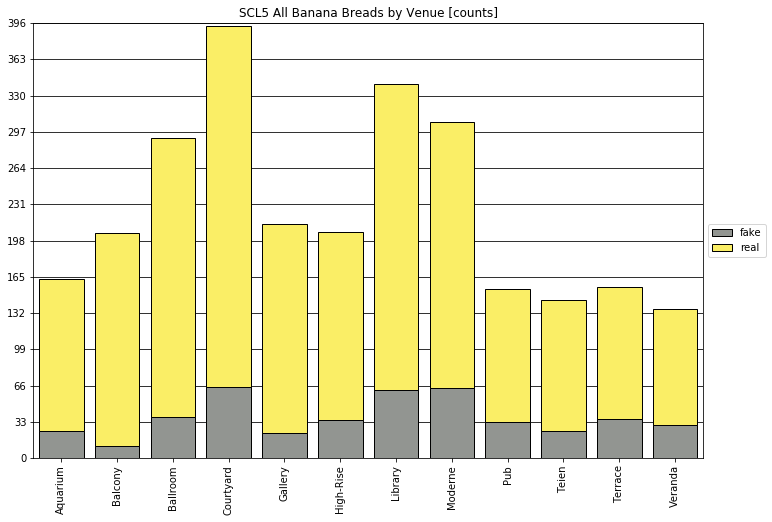

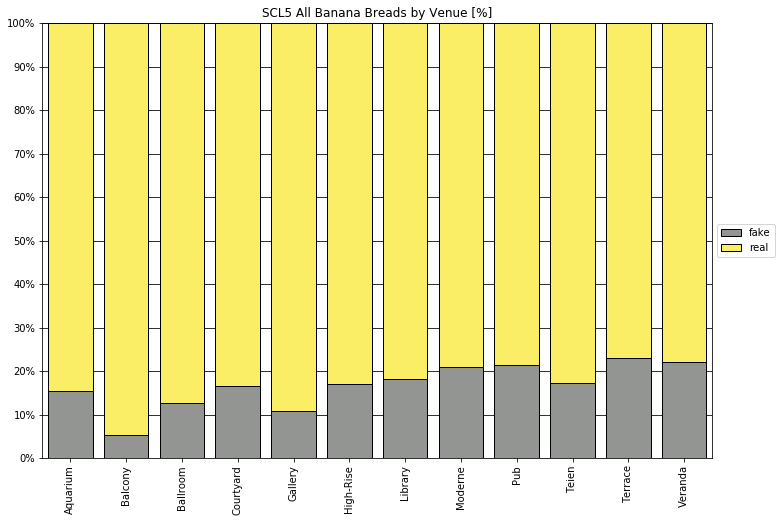

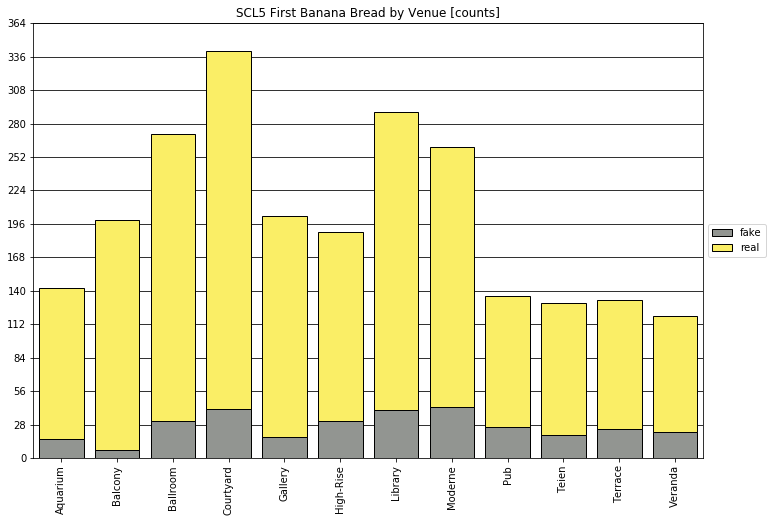

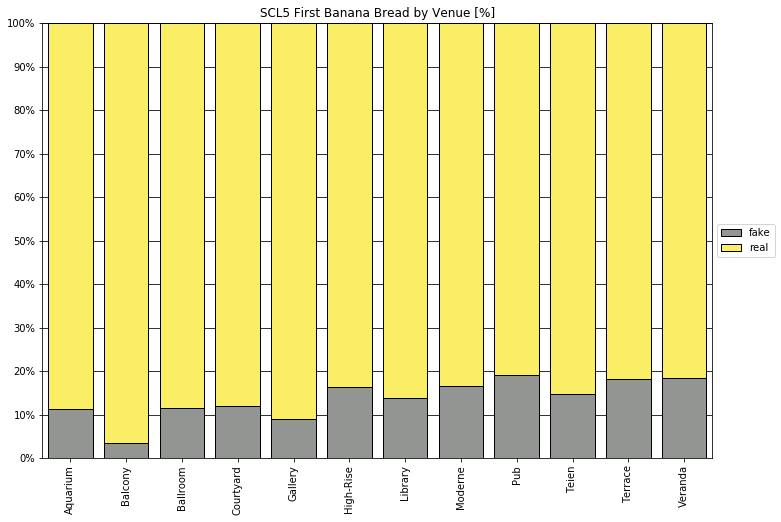

In [47]:
all_banana_bread_percentages(scl5_replays, "SCL5 All Banana Breads by Venue", groupby=lambda g: g.venue)
first_banana_bread_percentages(scl5_replays, "SCL5 First Banana Bread by Venue", groupby=lambda g: g.venue)

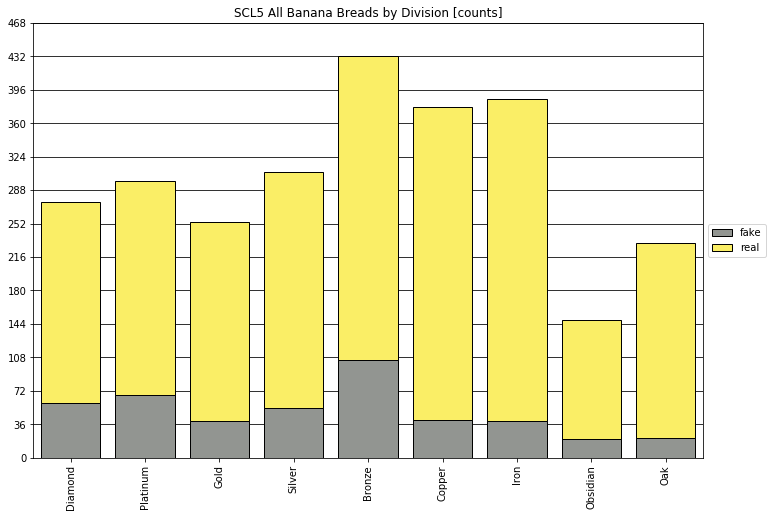

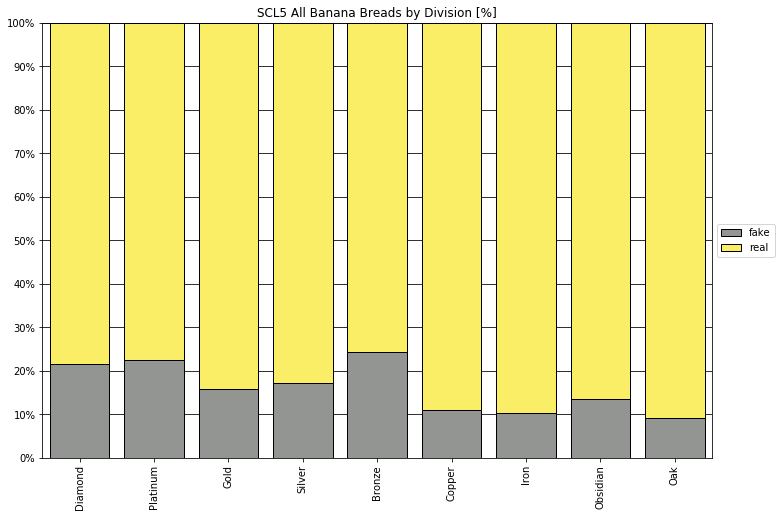

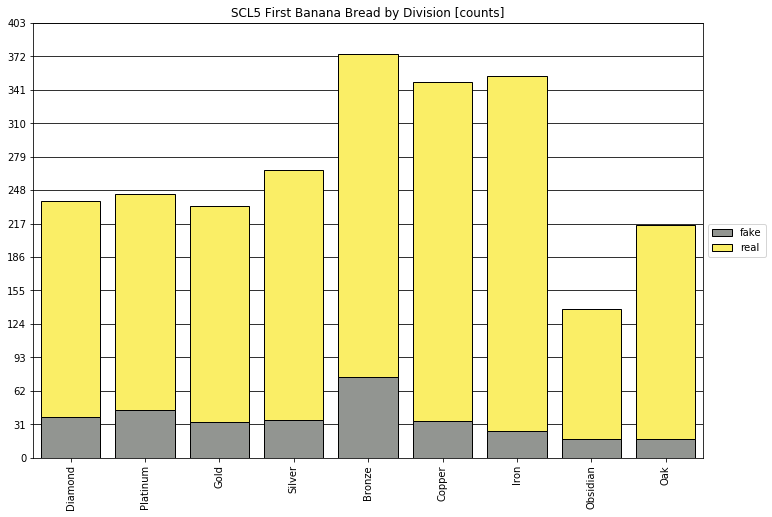

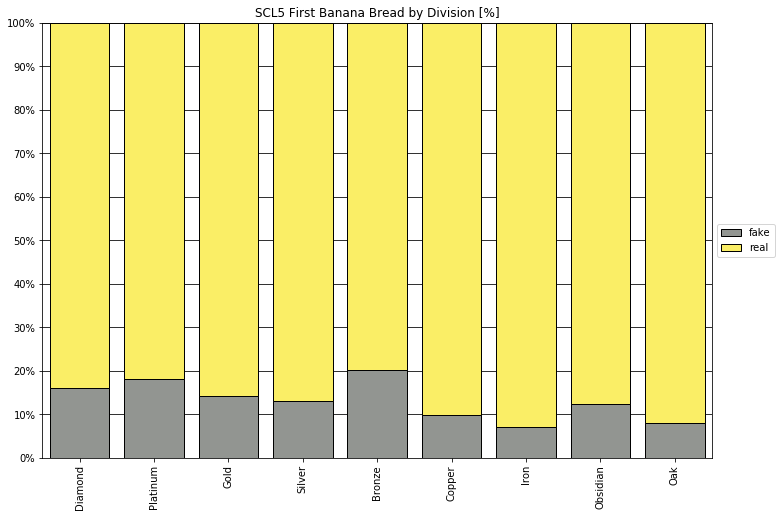

In [48]:
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 All Banana Breads by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)
first_banana_bread_percentages(
    scl5_replays,
    "SCL5 First Banana Bread by Division",
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

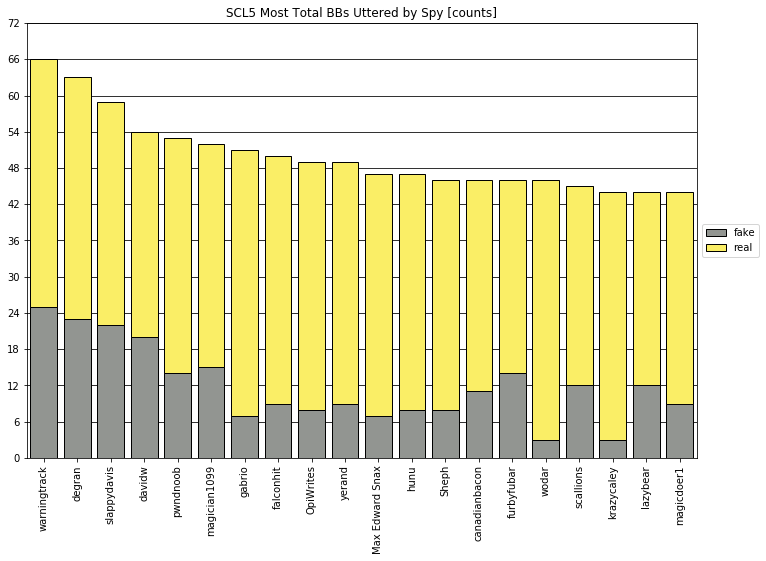

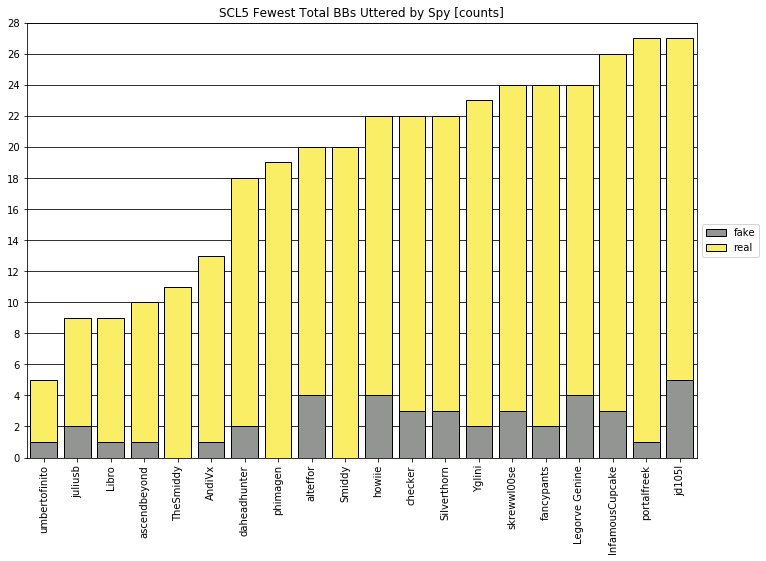

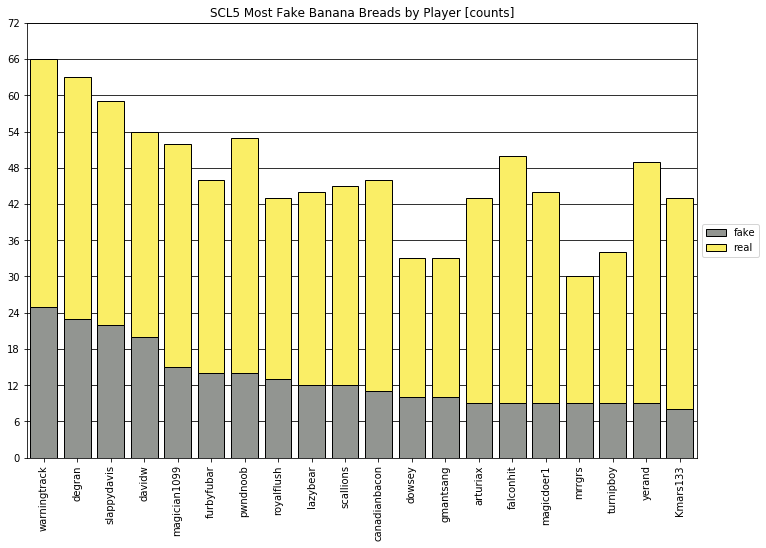

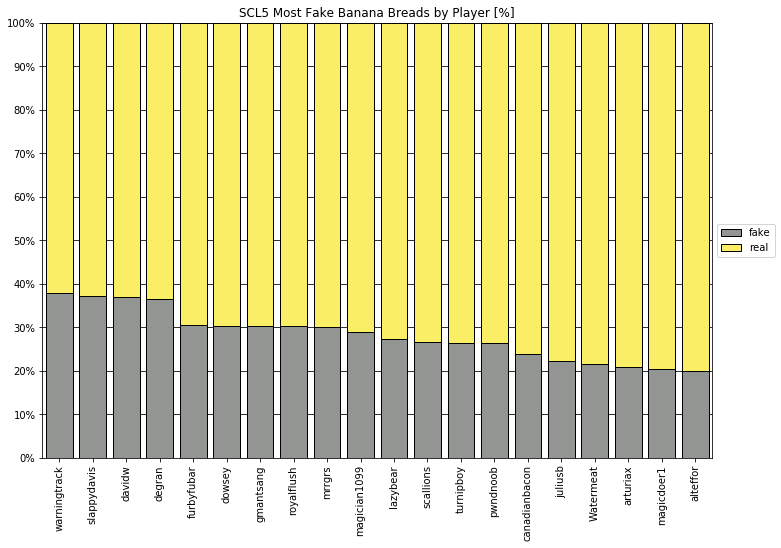

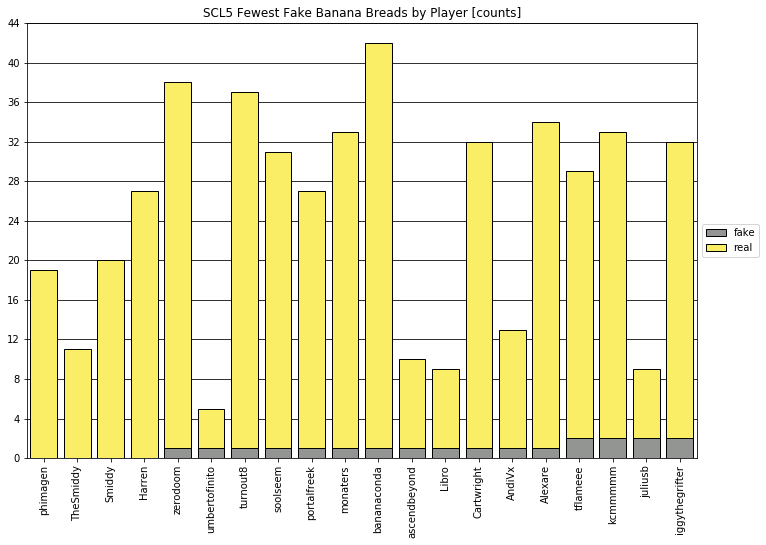

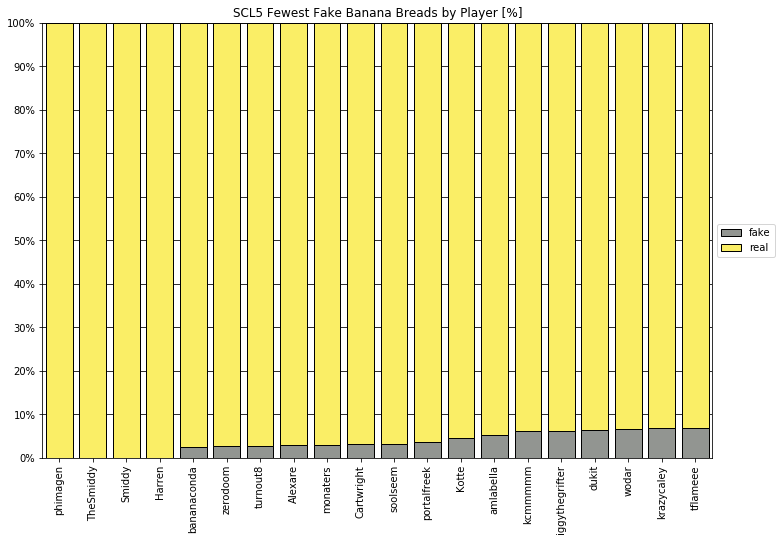

In [49]:
all_banana_bread_percentages(
    scl5_replays,
    'SCL5 Most Total BBs Uttered by Spy',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    limit=20,
    percentile_plot=False
)
all_banana_bread_percentages(
    scl5_replays,
    'SCL5 Fewest Total BBs Uttered by Spy',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    reversed_data_sort=True,
    limit=20,
    percentile_plot=False
)
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 Most Fake Banana Breads by Player",
    groupby=lambda g: g.spy,
    category_data_order="fake",
    limit=20
)
all_banana_bread_percentages(
    scl5_replays,
    "SCL5 Fewest Fake Banana Breads by Player",
    groupby=lambda g: g.spy,
    category_data_order="fake",
    reversed_data_sort=True,
    limit=20
)

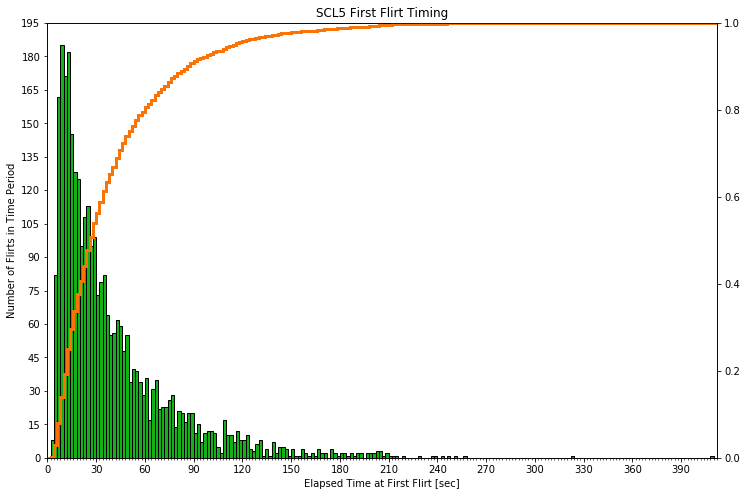

In [50]:
first_flirt_timing(scl5_replays, "SCL5 First Flirt Timing")

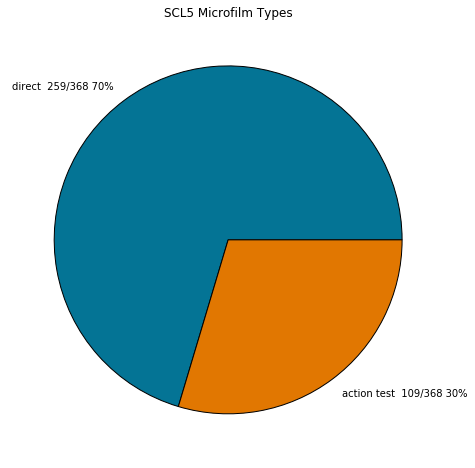

In [51]:
at_or_direct_mf(scl5_replays, "SCL5 Microfilm Types")

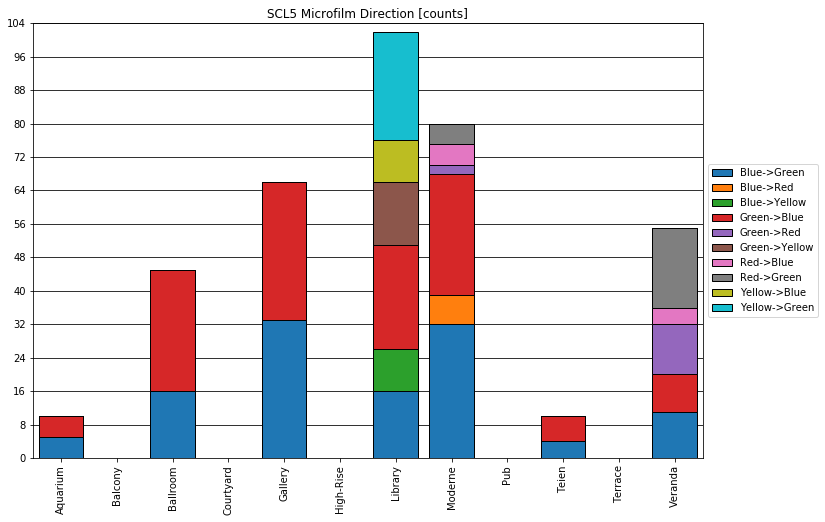

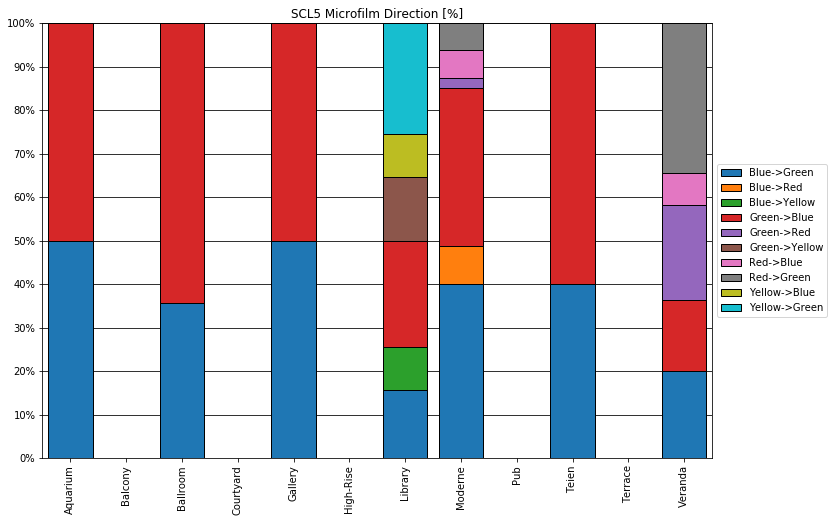

In [52]:
microfilm_direction(
    scl5_replays,
    "SCL5 Microfilm Direction",
    groupby=lambda g: g.venue,
)

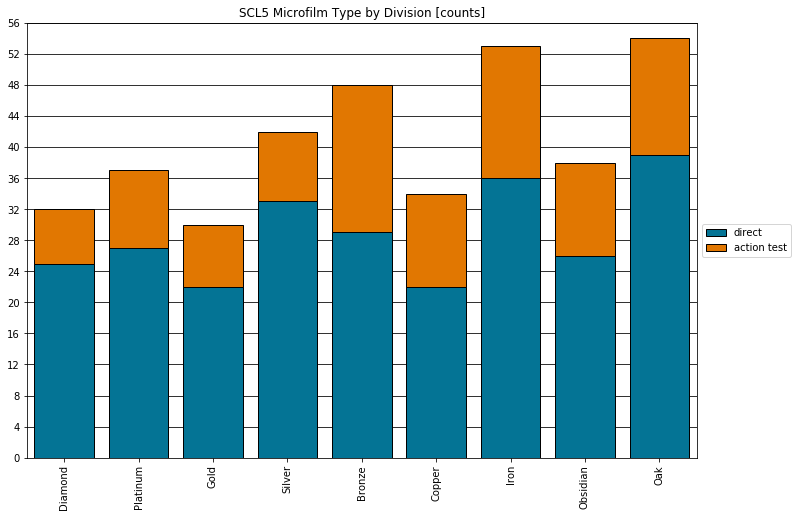

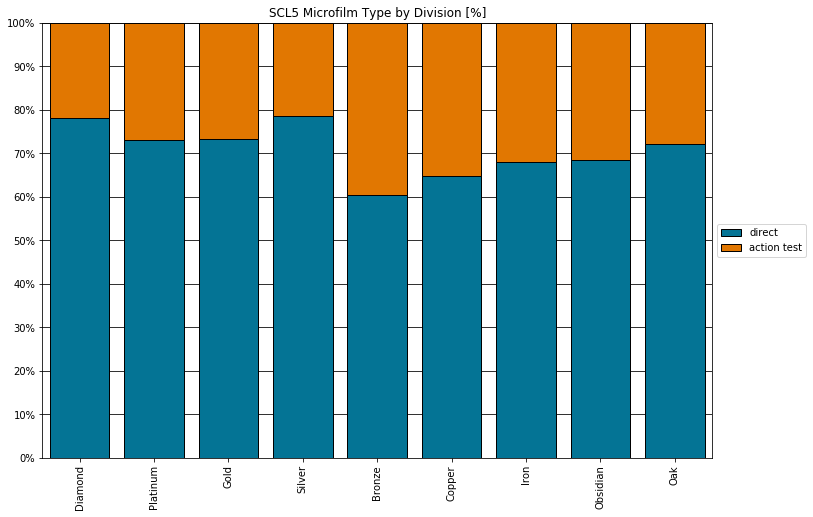

In [53]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g),
)

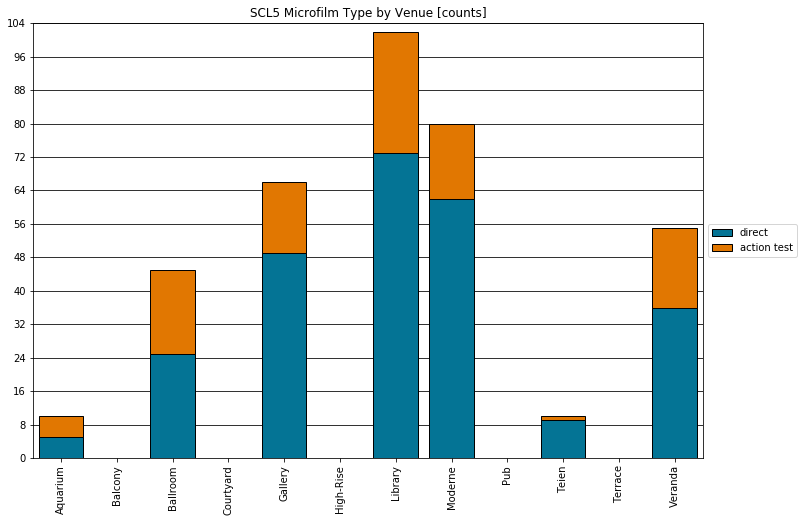

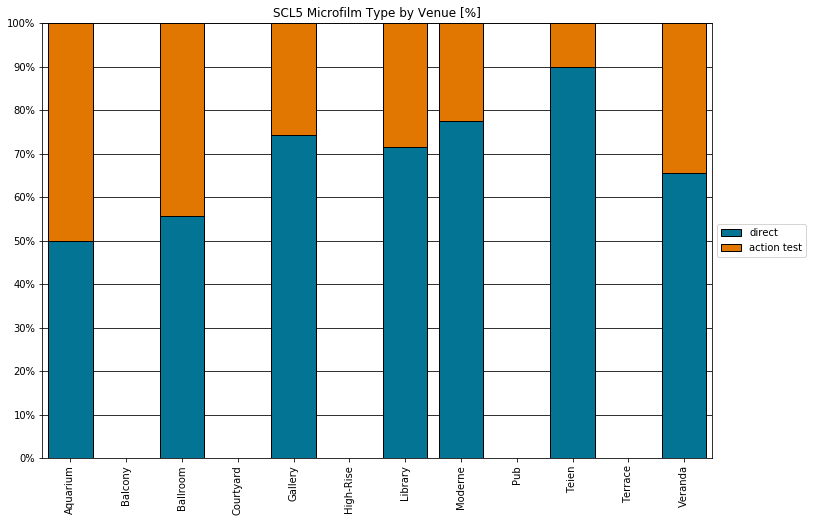

In [54]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Venue',
    groupby=lambda g: g.venue,
)

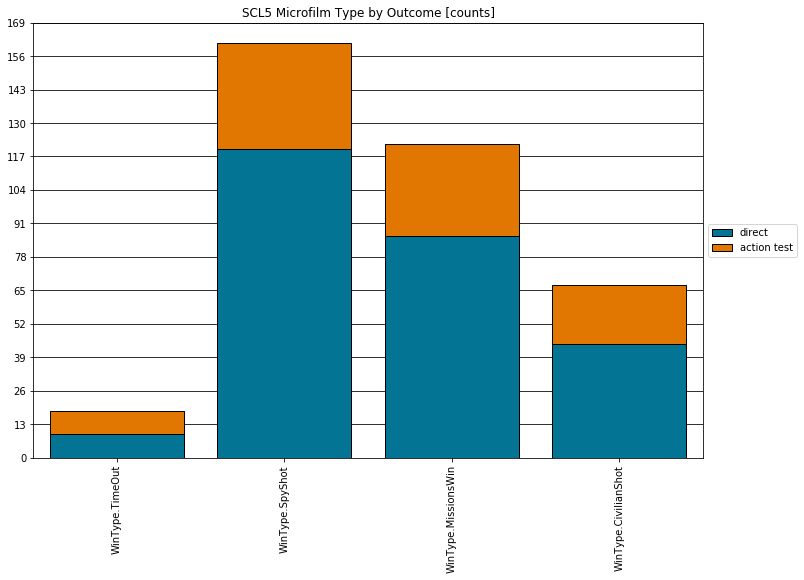

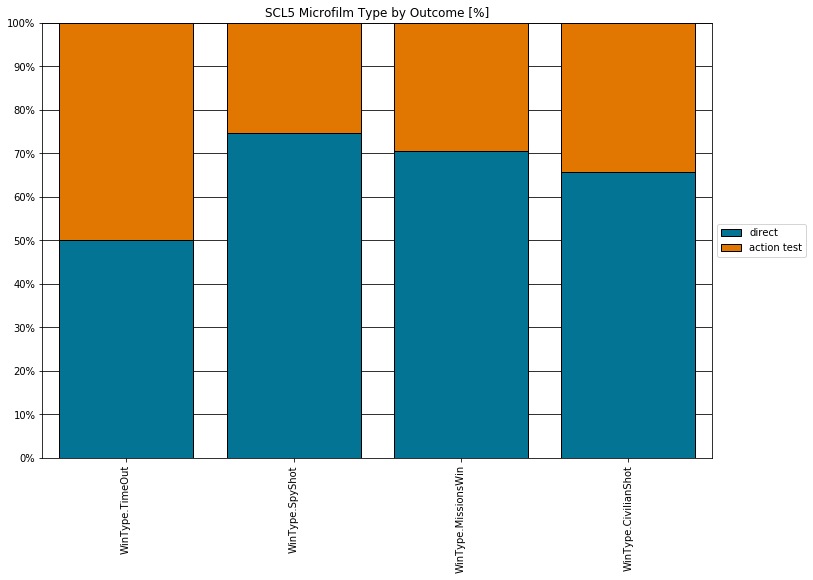

In [55]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Outcome',
    groupby=lambda g: g.win_type,
)

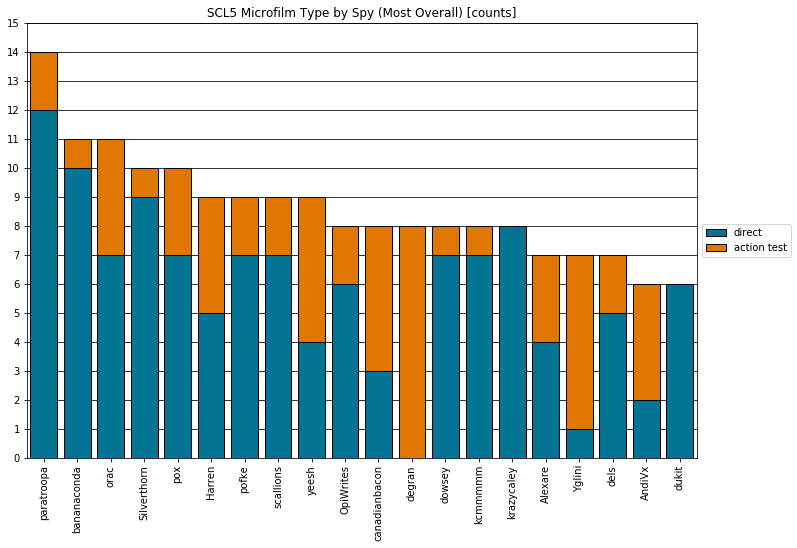

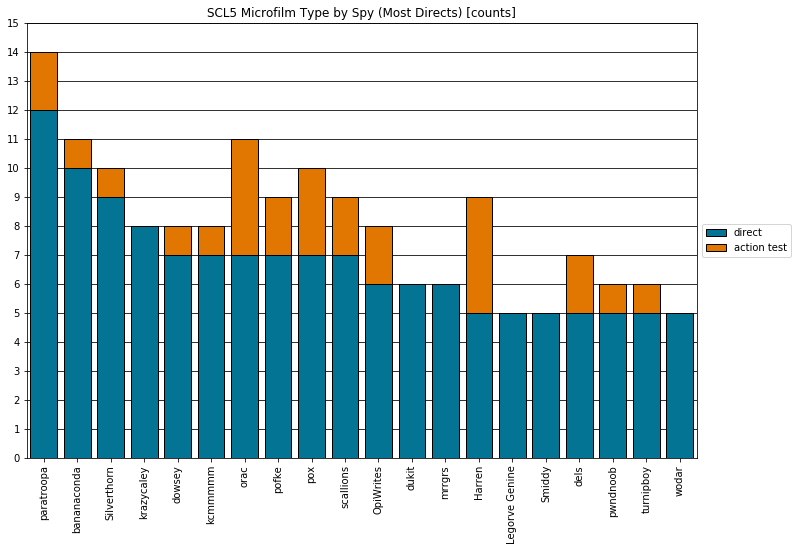

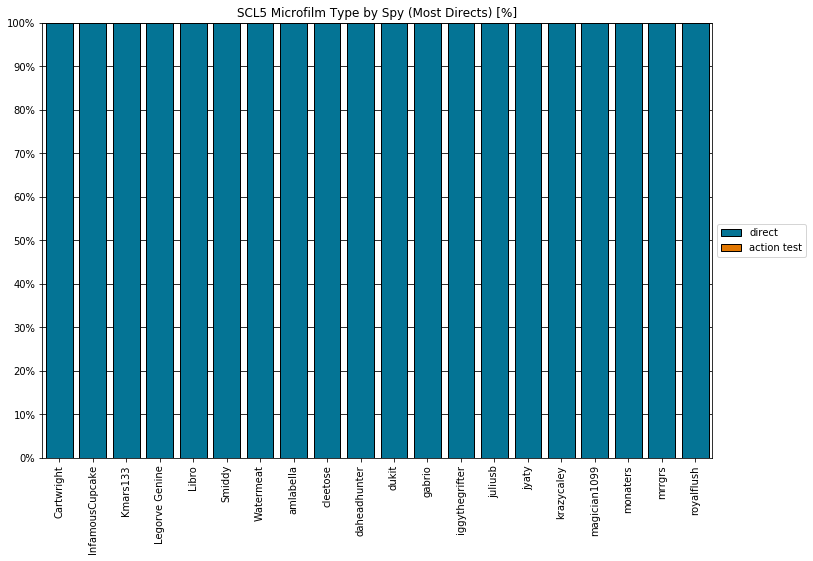

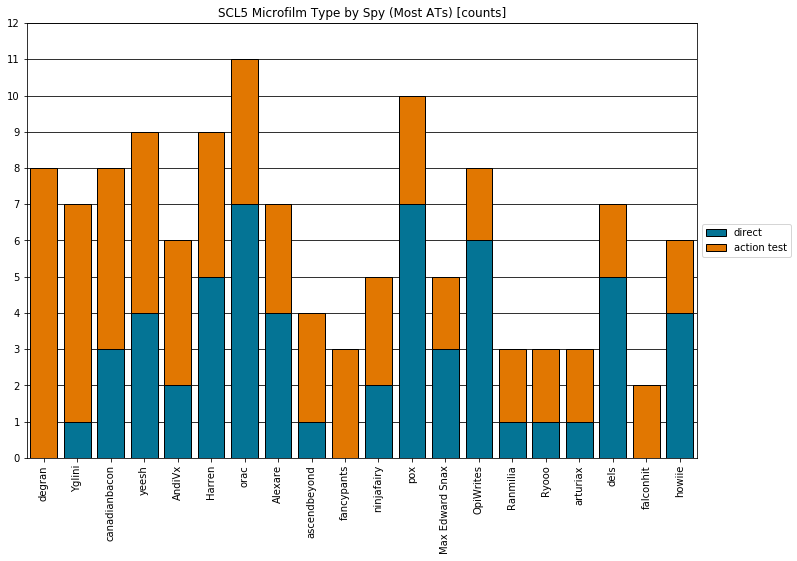

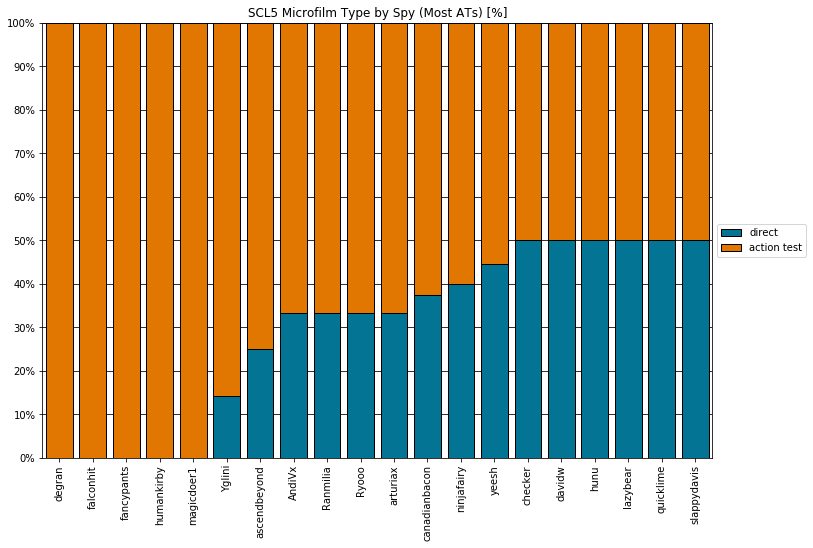

In [56]:
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most Overall)',
    groupby=lambda g: g.spy,
    category_data_order=sum,
    percentile_plot=False,
    limit=20
)
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most Directs)',
    groupby=lambda g: g.spy,
    category_data_order='direct',
    limit=20
)
at_or_direct_mf(
    scl5_replays,
    'SCL5 Microfilm Type by Spy (Most ATs)',
    groupby=lambda g: g.spy,
    category_data_order='action test',
    limit=20
)

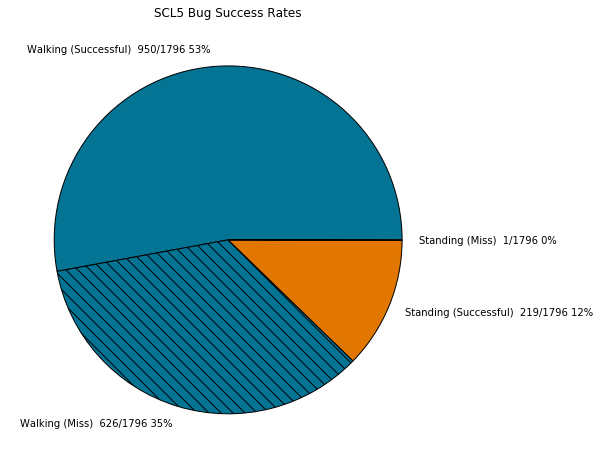

In [57]:
bug_success_rate(scl5_replays, "SCL5 Bug Success Rates")

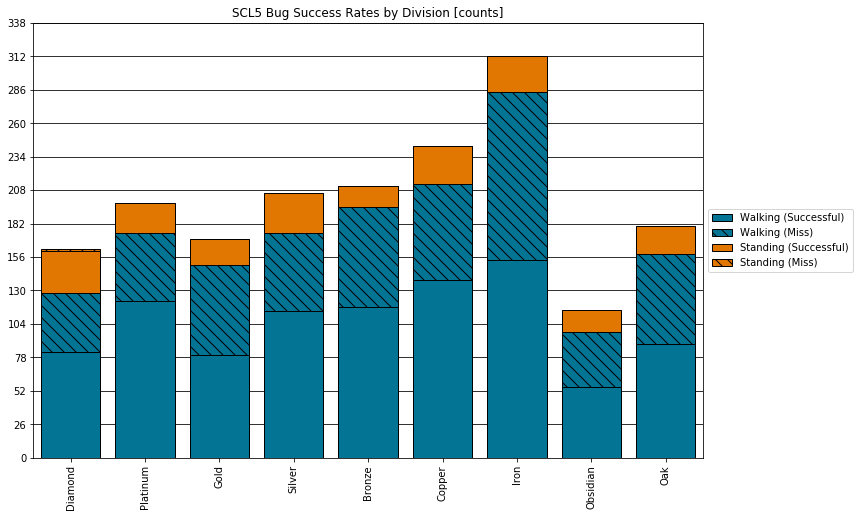

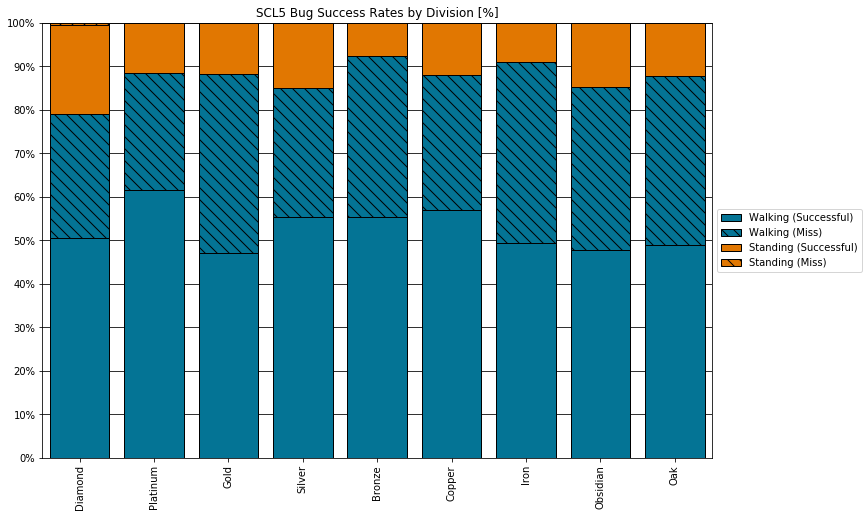

In [58]:
bug_success_rate(
    scl5_replays,
    'SCL5 Bug Success Rates by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

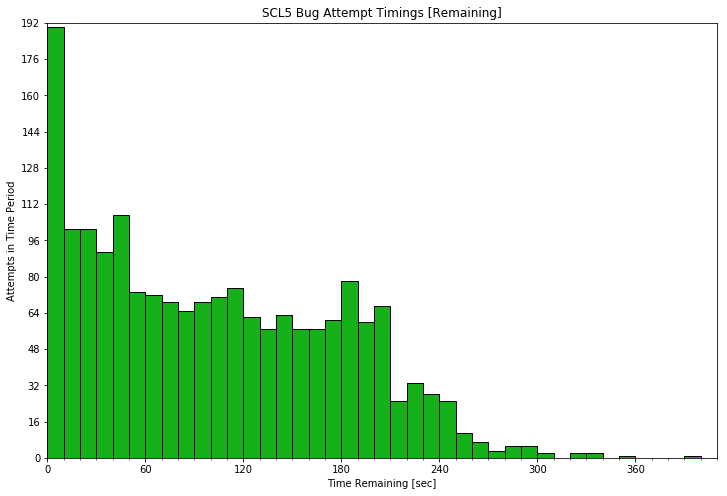

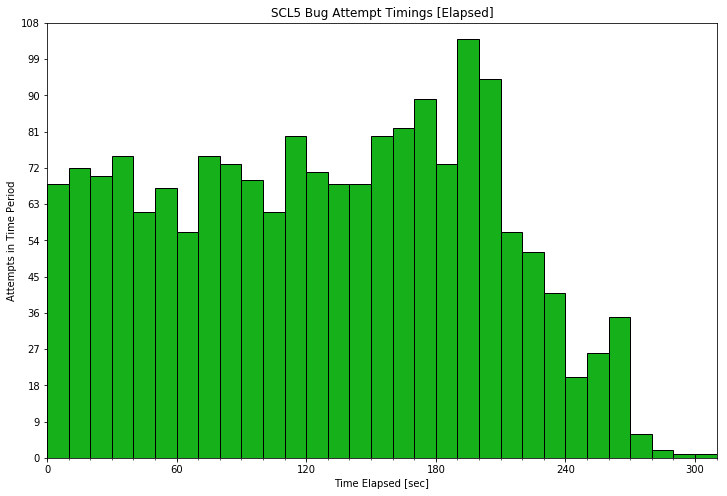

In [59]:
bug_attempt_timings(scl5_replays, "SCL5 Bug Attempt Timings")

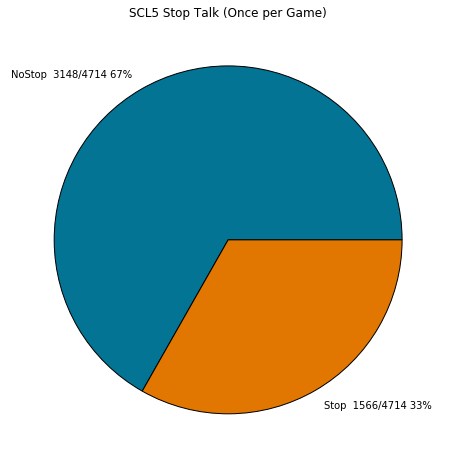

In [60]:
stop_talk_in_game_percentage(scl5_replays, "SCL5 Stop Talk (Once per Game)")

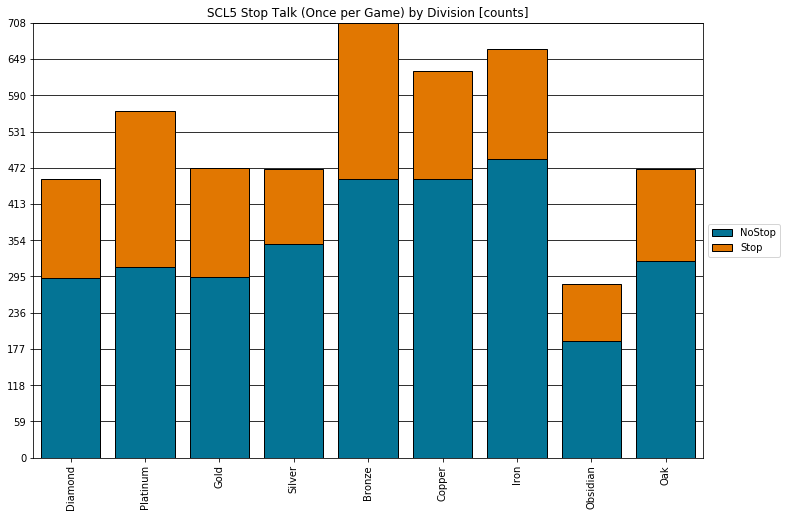

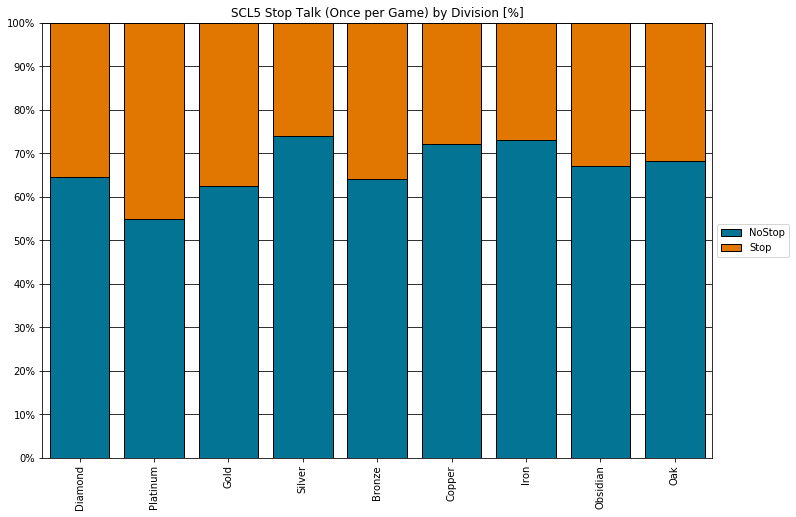

In [61]:
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Stop Talk (Once per Game) by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda g: DIVISIONS.index(g)
)

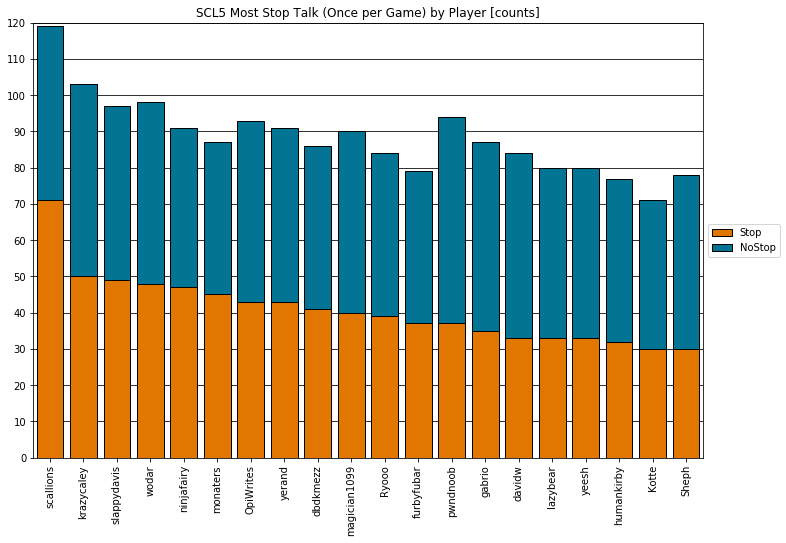

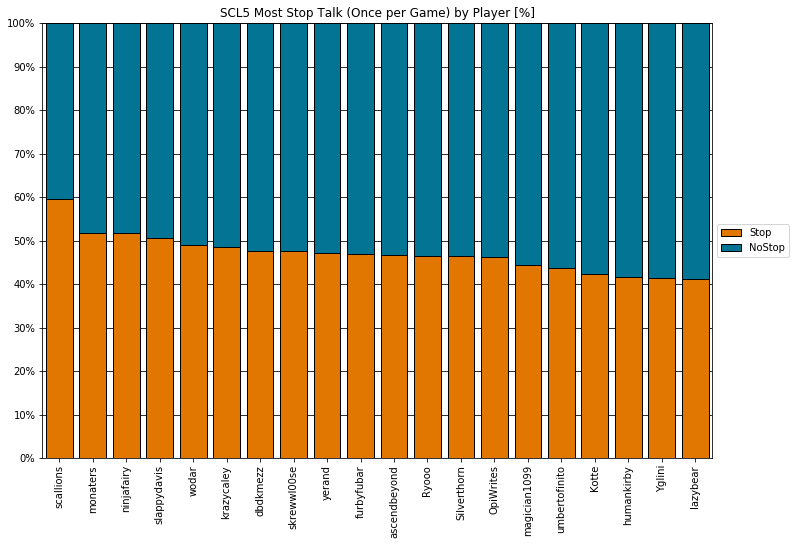

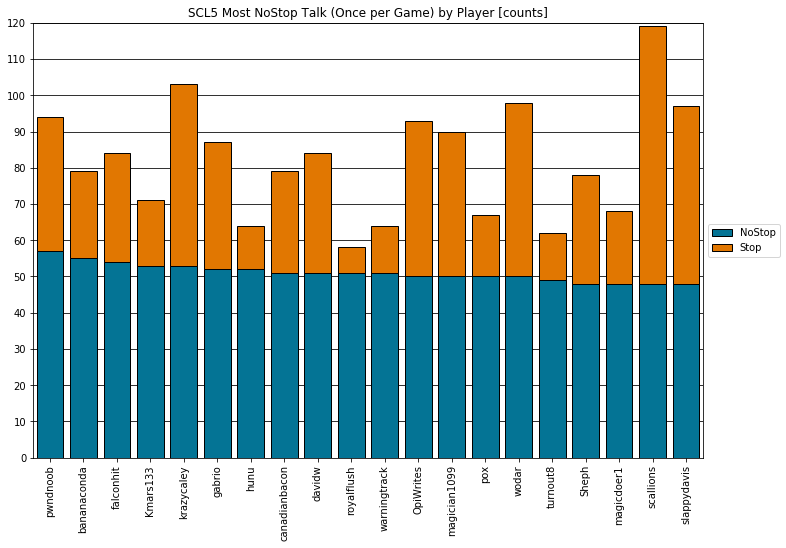

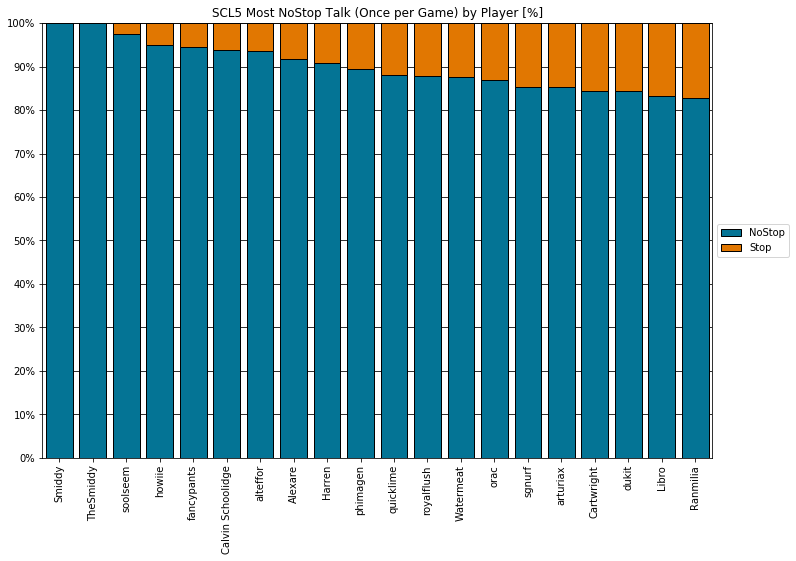

In [62]:
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Most Stop Talk (Once per Game) by Player',
    groupby=lambda g: g.spy,
    category_data_order='Stop',
    data_stack_order = ['Stop','NoStop'],
    limit=20
)
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Most NoStop Talk (Once per Game) by Player',
    groupby=lambda g: g.spy,
    category_data_order='NoStop',
    limit=20
)

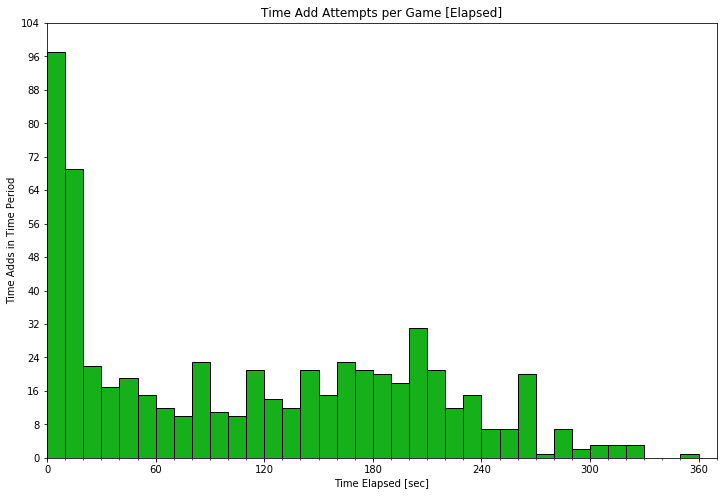

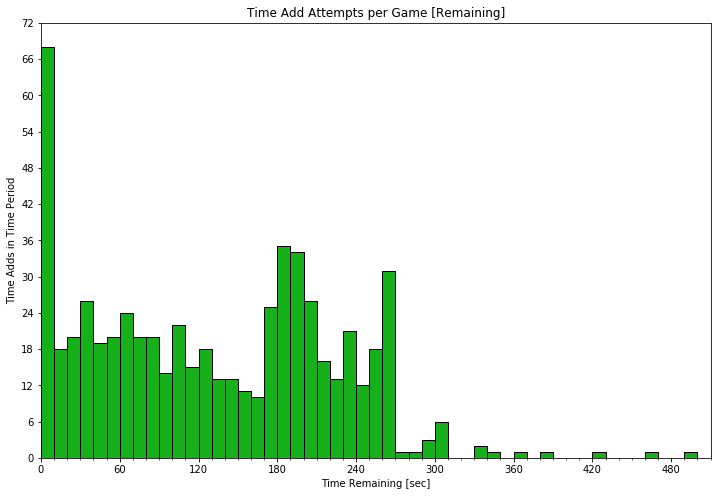

In [63]:
time_add_times(scl5_replays, "Time Add Attempts per Game")